# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings 
warnings.filterwarnings("ignore")


In [9]:
# Import the libraries you will be using for analysis
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt 
import seaborn as sns



In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [12]:
# Try loading one file
#comenting out local dir change . please set as appropriate
#os.chdir(r'C:\Users\Lenovo\Pictures\EPGML\NYC_ASSIGNMENT\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')
         
df = pd.read_parquet(r"2023-1.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [29]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
df['date'] = df['tpep_pickup_datetime'].dt.date
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df.groupby(['date', 'hour']).count()
#df_dt.head(5)

VendorID  tpep_pickup_datetime  tpep_dropoff_datetime  \
date       hour                                                          
2008-12-31 23           2                     2                      2   
2022-10-24 17           1                     1                      1   
           20           1                     1                      1   
           21           1                     1                      1   
           23           1                     1                      1   
...                   ...                   ...                    ...   
2023-01-31 20        6129                  6129                   6129   
           21        6172                  6172                   6172   
           22        5091                  5091                   5091   
           23        3015                  3015                   3015   
2023-02-01 0           10                    10                     10   

                 passenger_count  trip_distance  RatecodeID  \
date       hour                                               
2008-12-31 23                  2              2           2   
2022-10-24 17                  1              1           1   
           20                  1              1           1   
           21                  1              1           1   
           23                  1              1           1   
...                          ...            ...         ...   
2023-01-31 20               6041           6129        6041   
           21               6043           6172        6043   
           22               4975           5091        4975   
           23               2965           3015        2965   
2023-02-01 0                  10             10          10   

                 store_and_fwd_flag  PULocationID  DOLocationID  payment_type  \
date       hour                                                                 
2008-12-31 23                     2             2             2             2   
2022-10-24 17                     1             1             1             1   
           20                     1             1             1             1   
           21                     1             1             1             1   
           23                     1             1             1             1   
...                             ...           ...           ...           ...   
2023-01-31 20                  6041          6129          6129          6129   
           21                  6043          6172          6172          6172   
           22                  4975          5091          5091          5091   
           23                  2965          3015          3015          3015   
2023-02-01 0                     10            10            10            10   

                 fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
date       hour                                                          
2008-12-31 23              2      2        2           2             2   
2022-10-24 17              1      1        1           1             1   
           20              1      1        1           1             1   
           21              1      1        1           1             1   
           23              1      1        1           1             1   
...                      ...    ...      ...         ...           ...   
2023-01-31 20           6129   6129     6129        6129          6129   
           21           6172   6172     6172        6172          6172   
           22           5091   5091     5091        5091          5091   
           23           3015   3015     3015        3015          3015   
2023-02-01 0              10     10       10          10            10   

                 improvement_surcharge  total_amount  congestion_surcharge  \
date       hour                                                              
2008-12-31 23                        2             2         

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [36]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')
#os.chdir(r'C:\Users\Lenovo\Pictures\EPGML\NYC_ASSIGNMENT\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')


# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df_month = pd.read_parquet(file_path)
        df_month['date'] = df_month['tpep_pickup_datetime'].dt.date
        df_month['hour'] = df_month['tpep_pickup_datetime'].dt.hour



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()
        
        # Loop through dates and then loop through every hour of each date
        for date, date_df in df_month.groupby('date'):
            for hour, hour_df in date_df.groupby('hour'):
                sample = hour_df.sample(frac = 0.01, random_state = 42)
                sampled_data = pd.concat([sampled_data, sample])

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])# we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379268 entries, 428 to 2702382
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               379268 non-null  int64         
 1   tpep_pickup_datetime   379268 non-null  datetime64[us]
 2   tpep_dropoff_datetime  379268 non-null  datetime64[us]
 3   passenger_count        366326 non-null  float64       
 4   trip_distance          379268 non-null  float64       
 5   RatecodeID             366326 non-null  float64       
 6   store_and_fwd_flag     366326 non-null  object        
 7   PULocationID           379268 non-null  int64         
 8   DOLocationID           379268 non-null  int64         
 9   payment_type           379268 non-null  int64         
 10  fare_amount            379268 non-null  float64       
 11  extra                  379268 non-null  float64       
 12  mta_tax                379268 non-null  float6

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [43]:
#df.head(5)
df.reset_index(drop=True, inplace=True)
#df.info()
#df.head(5)
# Store the df in csv/parquet
df.to_parquet('./sampled_taxi_record.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [45]:
# Load the new data file

df = pd.read_parquet("sampled_taxi_record.parquet")

In [46]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

         date  hour Airport_fee  
0  2023-01-01     0         NaN  
1  2023-01-01     0         NaN  
2  2023-01-01     0         NaN  
3  2023-01-01     0         NaN  
4  2023-01-01     0         NaN  

[5 rows x 22 columns]

In [ ]:
# df.info()

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [84]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)
df.drop(columns=['date', 'hour'], inplace=True)



**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [85]:
# Combine the two airport fee columns
#df['Airport_fee'].head(10)
df['airport_fee_combine'] = df.apply(lambda x: x['airport_fee'] if np.isnan(x['Airport_fee']) else x['Airport_fee'], axis =1)
df['airport_fee_combine'].head(10)
df.drop(columns =['airport_fee', 'Airport_fee'], inplace=True)
df.rename(columns= {'airport_fee_combine': 'airport_fee'}, inplace=True)
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             0        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  \
0                    1.0         41.15                   0.0   
1                    1.0         15.48                   2.5   
2                    1.0         16.40                   2.5   
3                    1.0         11.50                   2.5   
4                    1.0         35.57                   NaN   

   airport_fee_combine  
0                 1.25  
1                 0.00  
2                 0.00  
3                 0.00  
4                  NaN

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [97]:
# check where values of fare amount are negative
df.loc[df['fare_amount'] < 0]

# No rows with negative fair amount values. check with 5% sampling(18L rows) also 

#df['fare_amount'].unique()


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [101]:
# Analyse RatecodeID for the negative fare amounts

# No negative values found for fare amount, RtecodeID has all defined values.
df.groupby('RatecodeID')['VendorID'].count()

RatecodeID
1.0     345900
2.0      14327
3.0       1176
4.0        724
5.0       2066
99.0      2133
Name: VendorID, dtype: int64

In [100]:
df.loc[df['RatecodeID'] == 99].head(10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
326          1  2023-01-01 11:39:40   2023-01-01 11:55:59              1.0   
587          1  2023-01-01 17:47:18   2023-01-01 18:12:13              1.0   
804          1  2023-01-02 06:46:39   2023-01-02 06:57:35              1.0   
849          1  2023-01-02 09:23:09   2023-01-02 09:38:34              1.0   
962          1  2023-01-02 12:48:02   2023-01-02 13:30:22              1.0   
989          1  2023-01-02 13:09:05   2023-01-02 13:25:32              1.0   
1760         1  2023-01-03 13:07:10   2023-01-03 13:42:25              1.0   
1796         1  2023-01-03 13:02:59   2023-01-03 13:24:44              1.0   
1860         1  2023-01-03 15:30:26   2023-01-03 16:39:39              1.0   
2338         1  2023-01-04 07:35:07   2023-01-04 07:56:45              1.0   

      trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
326             2.9        99.0                  N            42   
587             4.0        99.0                  N           191   
804             1.5        99.0                  N           225   
849             0.8        99.0                  N           179   
962             0.0        99.0                  N           159   
989             6.9        99.0                  N           137   
1760            0.0        99.0                  N            14   
1796            6.2        99.0                  N           159   
1860           13.0        99.0                  N           141   
2338            3.3        99.0                  N           218   

      DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
326             47             1         22.5    0.0      0.5         0.0   
587            218             1         29.5    0.0      0.5         0.0   
804             17             1         17.5    0.0      0.5         0.0   
849              7             1         15.2    0.0      0.5         0.0   
962             51             1         29.0    0.0      0.5         0.0   
989             42             1         31.5    0.0      0.5         0.0   
1760           216             1         46.5    0.0      0.5         0.0   
1796           220             1         27.5    0.0      0.5         0.0   
1860            35             1         55.5    0.0      0.5         0.0   
2338           130             1         20.5    0.0      0.5         0.0   

      tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
326           0.00                    1.0         24.00                   0.0   
587           0.00                    1.0         31.00                   0.0   
804           0.00                    1.0         19.00                   0.0   
849           0.00                    1.0         16.70                   0.0   
962           0.00                    1.0         30.50                   0.0   
989           0.00                    1.0         33.00                   0.0   
1760          0.00                    1.0         48.00                   0.0   
1796          0.00                    1.0         29.00                   0.0   
1860          6.55                    1.0         63.55                   0.0   
2338          0.00                    1.0         22.00                   0.0   

      airport_fee  
326           0.0  
587           0.0  
804           0.0  
849           0.0  
962           0.0  
989           0.0  
1760          0.0  
1796          0.0  
1860          0.0  
2338          0.0

In [109]:
# Find which columns have negative values
columns_with_negative_values = []
for column_name in df.columns:
    if df[column_name].dtype in ['int64', 'float64'] and df[column_name].lt(0).any():
        print(column_name)
        columns_with_negative_values.append(column_name)

extra
mta_tax
improvement_surcharge
total_amount
congestion_surcharge
airport_fee


In [112]:
# fix these negative values
#columns_with_negative_values
df.loc[df['extra'] <0].head(10)

#extra column has one negative value and this trip duration is only 8 secs so can be dropped safely. 
df = df.loc[~(df['extra'] <0)]

In [114]:
# mta_tax
df.loc[df['mta_tax'] <0].head(10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
68368          2  2023-11-03 15:51:42   2023-11-03 15:53:00              1.0   
72100          2  2023-11-06 19:30:44   2023-11-06 19:38:21              1.0   
75533          2  2023-11-09 18:20:22   2023-11-09 18:26:46              2.0   
90240          2  2023-11-22 15:44:42   2023-11-22 15:45:57              1.0   
108242         2  2023-12-09 08:34:26   2023-12-09 08:34:35              1.0   
129738         2  2023-12-29 17:32:20   2023-12-29 17:33:49              1.0   
139782         2  2023-03-08 15:51:33   2023-03-08 15:52:12              1.0   
192251         2  2023-06-25 05:59:41   2023-06-25 06:08:22              2.0   
197976         2  2023-06-30 21:37:09   2023-06-30 21:46:00              2.0   
199606         2  2023-08-02 16:04:37   2023-08-02 16:04:44              2.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
68368            0.21         2.0                  N           246   
72100            0.48         1.0                  N            75   
75533            0.79         1.0                  N           143   
90240            0.05         2.0                  N           132   
108242           0.00         2.0                  N           107   
129738           0.02         1.0                  N           161   
139782           0.00         1.0                  N           231   
192251           1.09         2.0                  N            90   
197976           1.38         2.0                  N           249   
199606           0.01         2.0                  N           237   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
68368            246             2          0.0    0.0     -0.5         0.0   
72100             75             2          0.0    0.0     -0.5         0.0   
75533            143             2          0.0    0.0     -0.5         0.0   
90240            132             4          0.0    0.0     -0.5         0.0   
108242           137             2          0.0    0.0     -0.5         0.0   
129738           161             2          0.0    0.0     -0.5         0.0   
139782           231             2          0.0    0.0     -0.5         0.0   
192251           170             2          0.0    0.0     -0.5         0.0   
197976           186             2          0.0    0.0     -0.5         0.0   
199606           237             2          0.0    0.0     -0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
68368            0.0                   -1.0         -4.00   
72100            0.0                   -1.0         -1.50   
75533            0.0                   -1.0         -4.00   
90240            0.0                   -1.0         -3.25   
108242           0.0                   -1.0         -4.00   
129738           0.0                   -1.0         -4.00   
139782           0.0                   -1.0         -1.50   
192251           0.0                   -1.0         -4.00   
197976           0.0                   -1.0         -4.00   
199606           0.0                   -1.0         -4.00   

        congestion_surcharge  airport_fee  
68368                   -2.5         0.00  
72100                    0.0         0.00  
75533                   -2.5         0.00  
90240                    0.0        -1.75  
108242                  -2.5         0.00  
129738                  -2.5         0.00  
139782                   0.0         0.00  
192251                  -2.5         0.00  
197976                  -2.5         0.00  
199606                  -2.5         0.00

In [116]:
df.groupby('mta_tax')['total_amount'].count()

mta_tax
-0.50        15
 0.00      3502
 0.05         4
 0.50    375736
 0.80         9
 4.00         1
Name: total_amount, dtype: int64

In [117]:
# Rows where mta_tax is -ve, fare_amount is 0, pickup and drop location are same in most cases, tota_amount is -ve 
# All the rows with mta_tax <0 shall be dropped. 
df = df.loc[~(df['mta_tax'] < 0)]

In [118]:
df.loc[(df['mta_tax'] < 0)]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [119]:
columns_with_negative_values

['extra',
 'mta_tax',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

In [121]:
# improvement_surcharge
df.loc[df['improvement_surcharge'] < 0].head(10)

# All rows with negative values were droped as part of mta_tax drop 

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [122]:
df.loc[df['total_amount'] < 0].head(10)

# All rows with negative values were droped as part of mta_tax drop 

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [123]:

df.loc[df['congestion_surcharge'] < 0].head(10)

# All rows with negative values were droped as part of mta_tax drop 

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [124]:

df.loc[df['airport_fee'] < 0].head(10)
# All rows with negative values were droped as part of mta_tax drop

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [143]:
# Find the proportion of missing values in each column
missing_counts = df.isnull().sum()
for index, value in missing_counts.items():
    print(f" {index} : {round((value/df.shape[0]) * 100, 2)}")

 VendorID : 0.0
 tpep_pickup_datetime : 0.0
 tpep_dropoff_datetime : 0.0
 passenger_count : 3.41
 trip_distance : 0.0
 RatecodeID : 3.41
 store_and_fwd_flag : 3.41
 PULocationID : 0.0
 DOLocationID : 0.0
 payment_type : 0.0
 fare_amount : 0.0
 extra : 0.0
 mta_tax : 0.0
 tip_amount : 0.0
 tolls_amount : 0.0
 improvement_surcharge : 0.0
 total_amount : 0.0
 congestion_surcharge : 3.41
 airport_fee : 3.41


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [154]:
#df['passenger_count'].unique()
#df['passenger_count'].describe()
df.groupby(['passenger_count'])['VendorID'].count()/df.shape[0] *100


passenger_count
0.0     1.535654
1.0    72.800143
2.0    14.536772
3.0     3.615538
4.0     2.007372
5.0     1.250883
6.0     0.839811
7.0     0.000527
8.0     0.000527
9.0     0.000264
Name: VendorID, dtype: float64

In [164]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df.loc[df['passenger_count'].isnull()]

# Replace missing values with mode. 
df['passenger_count'].fillna(1.0, inplace=True)

In [168]:
df.loc[df['passenger_count'] == 0]
# 1.5 % rows are having value as 0. Other attributes seem legitimate so chanigng them to mode vlaue. 
df['passenger_count'] = df.apply(lambda x: 1 if x['passenger_count'] == 0.0 else x['passenger_count'] , axis = 1)

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [229]:
# Fix missing values in 'RatecodeID'
#df[df['RatecodeID'].isnull()].head(10)

#df['RatecodeID'].describe()
#df.groupby('RatecodeID')['VendorID'].count()/df.shape[0] * 100
df['RatecodeID'].fillna(1.0, inplace=True)
df['RatecodeID'] = df.apply(lambda x : 1.0  if x['RatecodeID'] == 99.0 else x['RatecodeID'], axis =1 )

In [231]:
df[df['RatecodeID'].isnull()].head(10)

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [230]:
df[df['RatecodeID'] == 99].head(10)

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [195]:
# handle null values in congestion_surcharge
#df[df['congestion_surcharge'].isnull()].head(10)
df['congestion_surcharge'].describe()
#df.groupby(['congestion_surcharge'])['VendorID'].count()/df.shape[0] * 100
#df.groupby(['airport_fee'])['VendorID'].count()/df.shape[0] * 100

# congestion_surcharge is having only 2 values, either 0 or 2.5 , in the missing rows final amount is not summing up without congestion_charge
# So replacing the congestion charge with mode

df['congestion_surcharge'].fillna(2.5, inplace=True)

In [196]:
df[df['congestion_surcharge'].isnull()].head(10)

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [202]:
# Handle any remaining missing values
# airport_fee is hainvg missing valiues. 

#df.groupby('airport_fee')['VendorID'].sum()
#df[df['airport_fee'].isnull()].head(10)

#total_amount is miising a sum of ~1 , after adding a congestion_charge of 2.5, lowest airport_fee which 1.25 should be filled into missing values.

df['airport_fee'].fillna(1.25, inplace=True)

In [203]:
df[df['airport_fee'].isnull()].head(10)

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [204]:
missing_counts

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          12942
trip_distance                0
RatecodeID               12942
store_and_fwd_flag       12942
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     12942
airport_fee              12942
dtype: int64

In [209]:
#misisng values in ['store_and_fwd_flag'] 
#df.groupby(['store_and_fwd_flag'])['VendorID'].count()

df['store_and_fwd_flag'].fillna('N', inplace=True)

In [210]:
df.loc[df['store_and_fwd_flag'].isnull()].head()

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [789]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df[['payment_type', 'trip_distance', 'tip_amount']].describe()

payment_type  trip_distance     tip_amount
count  364374.000000  364374.000000  364374.000000
mean        1.203601       3.451156       3.557589
std         0.463628       4.537977       3.994297
min         1.000000       0.000000       0.000000
25%         1.000000       1.070000       1.000000
50%         1.000000       1.790000       2.860000
75%         1.000000       3.370000       4.420000
max         4.000000     187.350000     150.290000

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [222]:
# remove passenger_count > 6
df = df.loc[df['passenger_count'] < 7]

In [223]:
df.loc[df['passenger_count'] > 6]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [233]:
df = df.loc[(df['total_amount'] != 0) & (df['payment_type'] != 0)]

In [240]:
df = df.loc[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

In [241]:
df.loc[((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [254]:
# Continue with outlier handling

#df.groupby(['trip_distance'])['VendorID'].count()
#df.loc[df['trip_distance'] > 250 ].head(10)
df = df.loc[~(df['trip_distance'] > 250)]

In [255]:
df.loc[df['trip_distance'] > 250 ].head(10)

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [259]:
df.groupby(['fare_amount'])['VendorID'].count()
#sns.boxplot(data=df, x=df['fare_amount'])
#plt.show()

fare_amount
0.00         57
0.01         21
0.02          1
0.05          1
0.20          2
             ..
500.00        3
519.60        1
600.00        1
910.00        1
143163.45     1
Name: VendorID, Length: 994, dtype: int64

In [269]:
# fare amount more than 500 has trip distacnec 0 so drop
df = df.loc[df['fare_amount'] < 550]

In [270]:
df.loc[df['fare_amount'] > 550]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [290]:

df.loc[(df['tolls_amount'] > 10) & (df['trip_distance'] == 0) ].head(10)
#df.groupby('tolls_amount')['VendorID'].count()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
543           2  2023-01-01 16:39:00   2023-01-01 16:40:19              1.0   
2660          2  2023-01-04 14:49:22   2023-01-04 14:49:42              2.0   
7294          1  2023-01-09 10:07:35   2023-01-09 11:06:47              1.0   
11527         1  2023-01-13 13:16:34   2023-01-13 14:22:51              1.0   
12300         2  2023-01-14 01:52:01   2023-01-14 01:52:21              1.0   
16086         2  2023-01-17 23:42:37   2023-01-17 23:43:02              1.0   
27758         2  2023-01-29 00:08:16   2023-01-29 00:08:43              1.0   
28418         1  2023-01-29 18:02:40   2023-01-29 18:03:01              1.0   
35387         2  2023-10-05 16:30:43   2023-10-05 16:30:55              2.0   
54042         2  2023-10-22 00:56:14   2023-10-22 00:56:26              1.0   

       trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
543              0.0         5.0                  N             1   
2660             0.0         5.0                  N             1   
7294             0.0         1.0                  N           201   
11527            0.0         1.0                  N           234   
12300            0.0         5.0                  N           265   
16086            0.0         5.0                  N           265   
27758            0.0         5.0                  N           265   
28418            0.0         1.0                  N           100   
35387            0.0         5.0                  N             1   
54042            0.0         5.0                  N           265   

       DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
543               1             1        130.0    0.0      0.0       10.00   
2660              1             1        150.0    0.0      0.0       40.69   
7294            237             1         45.7    0.0      0.5        0.00   
11527           117             1         68.5    0.0      0.5        0.00   
12300           265             1         60.0    0.0      0.0       15.20   
16086           265             1        175.0    0.0      0.0       39.06   
27758           265             1         70.0    0.0      0.0        0.00   
28418           100             1          3.0    2.5      0.5       20.00   
35387             1             1         98.0    0.0      0.0       13.00   
54042           265             1        100.0    0.0      0.0        0.00   

       tolls_amount  improvement_surcharge  total_amount  \
543           13.75                    1.0        154.75   
2660          11.75                    1.0        204.69   
7294          11.45                    1.0         58.65   
11527         11.45                    1.0         81.45   
12300         15.00                    1.0         91.20   
16086         19.30                    1.0        234.36   
27758         12.75                    1.0         83.75   
28418         53.00                    1.0         80.00   
35387         28.75                    1.0        140.75   
54042         12.75                    1.0        113.75   

       congestion_surcharge  airport_fee  
543                     0.0         0.00  
2660                    0.0         1.25  
7294                    0.0         0.00  
11527                   0.0         0.00  
12300                   0.0         0.00  
16086                   0.0         0.00  
27758                   0.0         0.00  
28418                   2.5         0.00  
35387                   0.0         0.00  
54042                   0.0         0.00

In [295]:
# dropping rows with high tolls_amount and trip distance 0
df = df.loc[~((df['tolls_amount'] > 20) & (df['trip_distance'] == 0))]

In [296]:
df.loc[(df['tolls_amount'] > 20) & (df['trip_distance'] == 0) ]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [308]:
df.loc[(df['trip_distance'] == 0) & (df['fare_amount'] > 20.0)].count()

VendorID                 1861
tpep_pickup_datetime     1861
tpep_dropoff_datetime    1861
passenger_count          1861
trip_distance            1861
RatecodeID               1861
store_and_fwd_flag       1861
PULocationID             1861
DOLocationID             1861
payment_type             1861
fare_amount              1861
extra                    1861
mta_tax                  1861
tip_amount               1861
tolls_amount             1861
improvement_surcharge    1861
total_amount             1861
congestion_surcharge     1861
airport_fee              1861
dtype: int64

In [310]:
#dropping all rows having trip distance as 0 and fare_amount is higher. in these case mostly pick up and drop location is same and trip time is few secs.seems outlier
df = df.loc[~((df['trip_distance'] == 0) & (df['fare_amount'] > 20.0))]

In [311]:
df.loc[(df['trip_distance'] == 0) & (df['fare_amount'] > 20.0)]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [313]:
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  364374.000000                      364374                      364374   
mean        1.737956  2023-07-01 20:54:33.034612  2023-07-01 21:11:50.181544   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000  2023-04-01 20:15:04.500000  2023-04-01 20:33:28.500000   
50%         2.000000         2023-06-26 06:40:19  2023-06-26 06:55:05.500000   
75%         2.000000         2023-10-05 19:19:57         2023-10-05 19:37:15   
max         2.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.439747                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    364374.000000  364374.000000  364374.000000  364374.000000   
mean          1.382643       3.451156       1.063520     165.460971   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.070000       1.000000     132.000000   
50%           1.000000       1.790000       1.000000     162.000000   
75%           1.000000       3.370000       1.000000     234.000000   
max           6.000000     187.350000       5.000000     265.000000   
std           0.874608       4.537977       0.342458      63.634145   

        DOLocationID   payment_type    fare_amount          extra  \
count  364374.000000  364374.000000  364374.000000  364374.000000   
mean      164.268441       1.203601      19.477872       1.638499   
min         1.000000       1.000000       0.000000       0.000000   
25%       114.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000     519.600000      14.250000   
std        69.674221       0.463628      17.731705       1.827950   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  364374.000000  364374.000000  364374.000000          364374.000000   
mean        0.496627       3.557589       0.582065               0.999615   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.860000       0.000000               1.000000   
75%         0.500000       4.420000       0.000000               1.000000   
max         4.000000     150.290000      86.000000               1.000000   
std         0.041465       3.994297       2.143368               0.017250   

        total_amount  congestion_surcharge    airport_fee  
count  364374.000000         364374.000000  364374.000000  
mean       28.581571              2.317138       0.141623  
min         1.000000              0.000000       0.000000  
25%        15.960000              2.500000       0.000000  
50%        21.000000              2.500000       0.000000  
75%        30.400000              2.500000       0.000000  
max       535.750000              2.500000       1.750000  
std        22.380619              0.650935       0.462775

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364374 entries, 0 to 379267
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               364374 non-null  int64         
 1   tpep_pickup_datetime   364374 non-null  datetime64[us]
 2   tpep_dropoff_datetime  364374 non-null  datetime64[us]
 3   passenger_count        364374 non-null  float64       
 4   trip_distance          364374 non-null  float64       
 5   RatecodeID             364374 non-null  float64       
 6   store_and_fwd_flag     364374 non-null  object        
 7   PULocationID           364374 non-null  int64         
 8   DOLocationID           364374 non-null  int64         
 9   payment_type           364374 non-null  int64         
 10  fare_amount            364374 non-null  float64       
 11  extra                  364374 non-null  float64       
 12  mta_tax                364374 non-null  float64  

In [316]:
# Do any columns need standardising?

df.reset_index(drop=True, inplace=True)

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364374 entries, 0 to 364373
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               364374 non-null  int64         
 1   tpep_pickup_datetime   364374 non-null  datetime64[us]
 2   tpep_dropoff_datetime  364374 non-null  datetime64[us]
 3   passenger_count        364374 non-null  float64       
 4   trip_distance          364374 non-null  float64       
 5   RatecodeID             364374 non-null  float64       
 6   store_and_fwd_flag     364374 non-null  object        
 7   PULocationID           364374 non-null  int64         
 8   DOLocationID           364374 non-null  int64         
 9   payment_type           364374 non-null  int64         
 10  fare_amount            364374 non-null  float64       
 11  extra                  364374 non-null  float64       
 12  mta_tax                364374 non-null  floa

In [329]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype(str)

In [330]:
#df['store_and_fwd_flag'].dtype
#df.info()

dtype('O')

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [341]:
# Find and show the hourly trends in taxi pickups
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.weekday
df['pick_up_month'] = df['tpep_pickup_datetime'].dt.month


In [342]:
df.head(5)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4           7.10         1.0                  N           246            37   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             1  ...      0.5        7.90           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         47.40                   2.5         0.00   

   pickup_hour  pickup_day  pick_up_month  
0            0           6              1  
1            0           6              1  
2            0           6              1  
3            0           6              1  
4            0           6              1  

[5 rows x 22 columns]

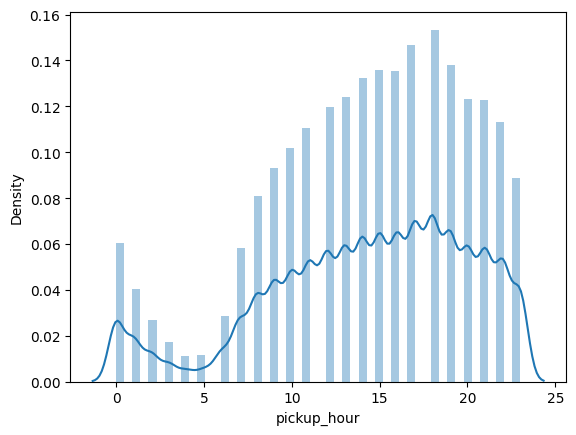

In [339]:
sns.distplot(df['pickup_hour'])
plt.show()

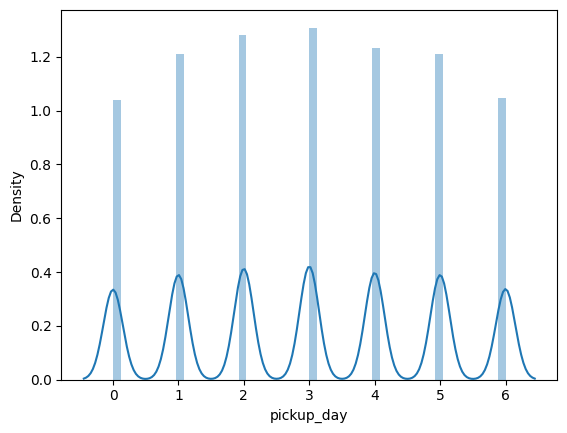

In [346]:
# Find and show the daily trends in taxi pickups (days of the week)
sns.distplot(df['pickup_day'])
plt.show()


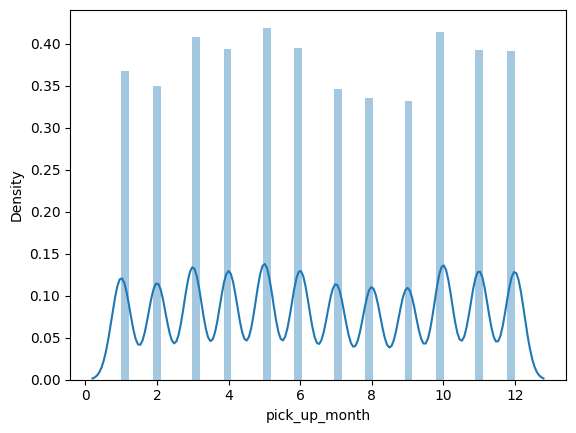

In [347]:
# Show the monthly trends in pickups
sns.distplot(df['pick_up_month'])
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [348]:
# Analyse the above parameters
#checking the min, max values
df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].describe()

#fare_amount, tip_amount  and trip_distance has min value as 0 . 

fare_amount     tip_amount   total_amount  trip_distance
count  364374.000000  364374.000000  364374.000000  364374.000000
mean       19.477872       3.557589      28.581571       3.451156
std        17.731705       3.994297      22.380619       4.537977
min         0.000000       0.000000       1.000000       0.000000
25%         9.300000       1.000000      15.960000       1.070000
50%        13.500000       2.860000      21.000000       1.790000
75%        21.900000       4.420000      30.400000       3.370000
max       519.600000     150.290000     535.750000     187.350000

In [350]:
#checking if any negative vlaues present
df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].lt(0).any()

#no negative values found

fare_amount      False
tip_amount       False
total_amount     False
trip_distance    False
dtype: bool

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

Yes, except tip_amount, tip_amount is zero in most of the cases so leaving out this will not give the right insight 

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

Definition of trip_distance is "The elapsed trip distance in miles reported by the taximeter."
So it should not be zero although if pickup and drop of location is in same zone. 

In [353]:
# Create a df with non zero entries for the selected parameters.

df_fa = df.loc[(df['fare_amount'] > 0.0 ) & (df['total_amount'] > 0.0 ) & (df['trip_distance'] > 0.0 )]


In [354]:
df_fa.head(5)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4           7.10         1.0                  N           246            37   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             1  ...      0.5        7.90           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         47.40                   2.5         0.00   

   pickup_hour  pickup_day  pick_up_month  
0            0           6              1  
1            0           6              1  
2            0           6              1  
3            0           6              1  
4            0           6              1  

[5 rows x 22 columns]

In [357]:

df_fa.reset_index(drop=True, inplace=True)
df_fa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361719 entries, 0 to 361718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               361719 non-null  int64         
 1   tpep_pickup_datetime   361719 non-null  datetime64[us]
 2   tpep_dropoff_datetime  361719 non-null  datetime64[us]
 3   passenger_count        361719 non-null  float64       
 4   trip_distance          361719 non-null  float64       
 5   RatecodeID             361719 non-null  float64       
 6   store_and_fwd_flag     361719 non-null  object        
 7   PULocationID           361719 non-null  int64         
 8   DOLocationID           361719 non-null  int64         
 9   payment_type           361719 non-null  int64         
 10  fare_amount            361719 non-null  float64       
 11  extra                  361719 non-null  float64       
 12  mta_tax                361719 non-null  floa

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

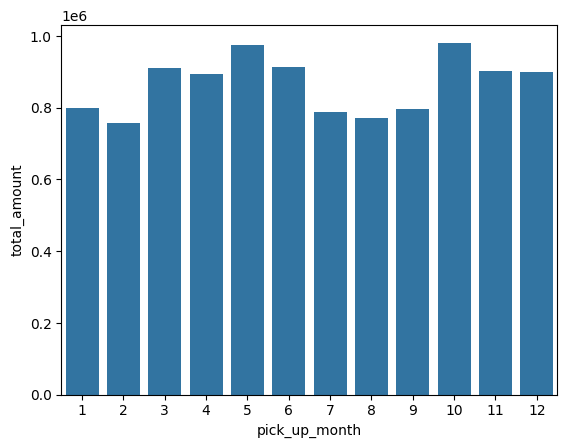

In [370]:
# Group data by month and analyse monthly revenue
#df_fa.groupby('pick_up_month')['total_amount'].sum()
sns.barplot(df_fa.groupby(['pick_up_month'])['total_amount'].sum())
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

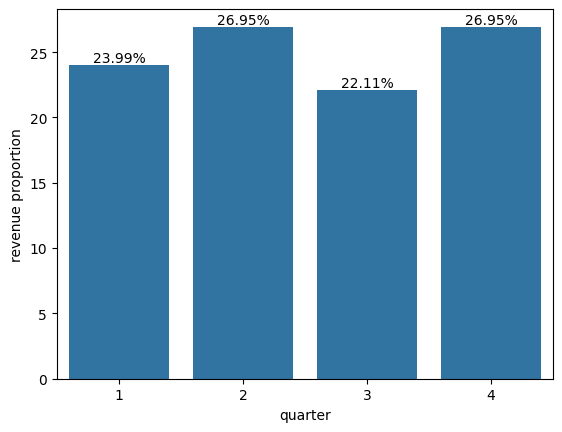

In [376]:
# Calculate proportion of each quarter
df_fa['pick_up_quarter'] = df['tpep_pickup_datetime'].dt.quarter
quarter_revenue = df_fa.groupby(['pick_up_quarter'])['total_amount'].sum()
total_revenue = sum(quarter_revenue)
prop_quart_revenue = pd.Series(dtype = 'int64')

for quart, amount in quarter_revenue.items():
    prop_quart_revenue.at[quart] = round(((amount/total_revenue) *100), 2) 

sns.barplot(prop_quart_revenue)
plt.xlabel('quarter')
plt.ylabel('revenue proportion')
for i, v in enumerate(prop_quart_revenue):
    plt.text(i, v, str(v) + '%', ha='center', va='bottom')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

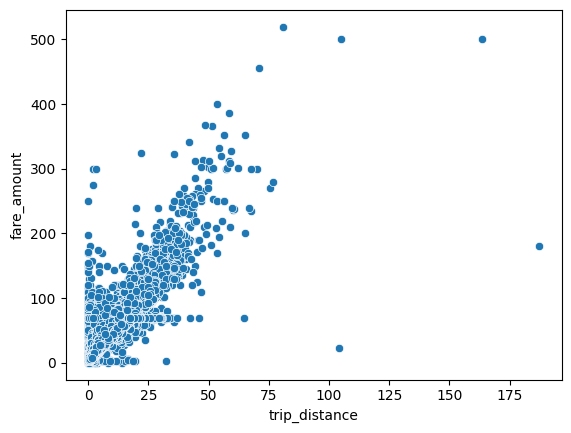

In [379]:
# Show how trip fare is affected by distance
#df_fa[df_fa['trip_distance'] == 0]
# we already have discarded 0 trip_distance in our dataframe.
sns.scatterplot(data = df_fa, x= 'trip_distance', y='fare_amount')
plt.show()

In [384]:
df_fa = df_fa.loc[df_fa['trip_distance'] < 100]

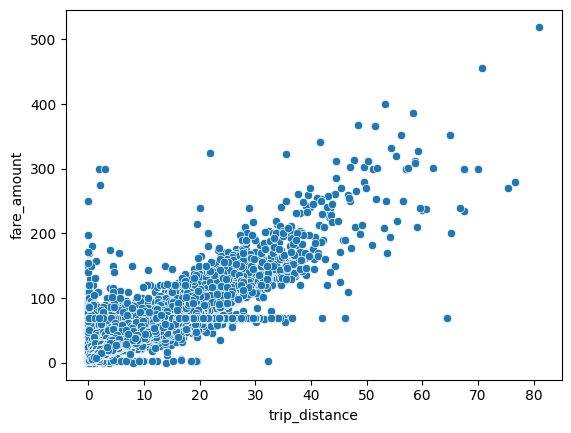

In [385]:
sns.scatterplot(data = df_fa, x= 'trip_distance', y='fare_amount')
plt.show()

In [386]:
df[['trip_distance', 'fare_amount']].corr()

trip_distance  fare_amount
trip_distance       1.000000     0.943458
fare_amount         0.943458     1.000000

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [388]:
# Show relationship between fare and trip duration
#df['trip_duration'] = pd.to_datetime(df['tpep_dropoff_datetime']) - pd.to_datetime(df['tpep_pickup_datetime'])

df_fa['trip_duration'] = df_fa['tpep_dropoff_datetime'] - df_fa['tpep_pickup_datetime']

df_fa['trip_duration'] = df_fa['trip_duration'].dt.total_seconds()

df_fa[['fare_amount', 'trip_duration']].corr()


fare_amount  trip_duration
fare_amount       1.000000       0.277876
trip_duration     0.277876       1.000000

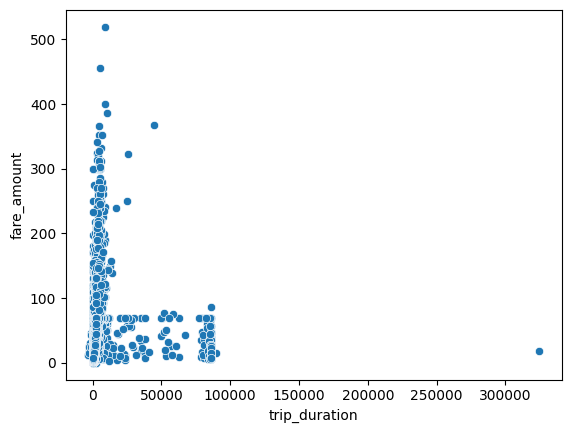

In [427]:
sns.scatterplot(data = df_fa, x='trip_duration', y='fare_amount' )
plt.show()

In [392]:
# Show relationship between fare and number of passengers
df_fa[['fare_amount', 'passenger_count']].corr()


fare_amount  passenger_count
fare_amount         1.000000         0.042624
passenger_count     0.042624         1.000000

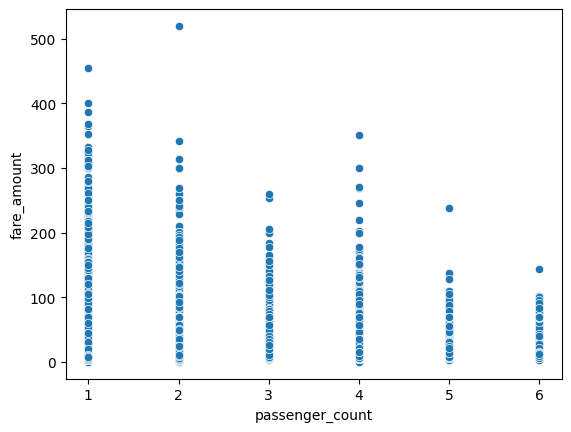

In [428]:
sns.scatterplot(data = df_fa, x='passenger_count', y='fare_amount' )
plt.show()

In [394]:
# Show relationship between tip and trip distance

df_fa[['tip_amount', 'trip_distance']].corr()

tip_amount  trip_distance
tip_amount        1.00000        0.59086
trip_distance     0.59086        1.00000

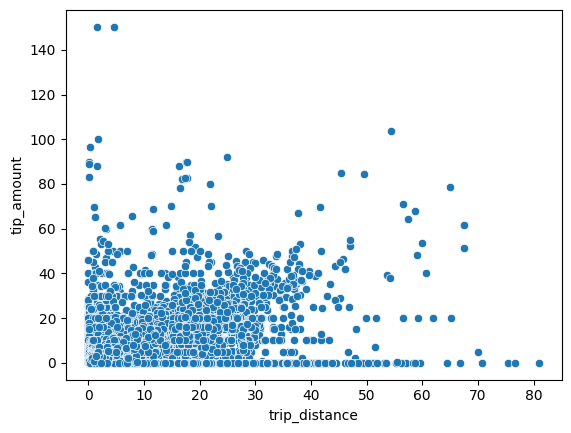

In [429]:
sns.scatterplot(data = df_fa, x='trip_distance', y='tip_amount' )
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

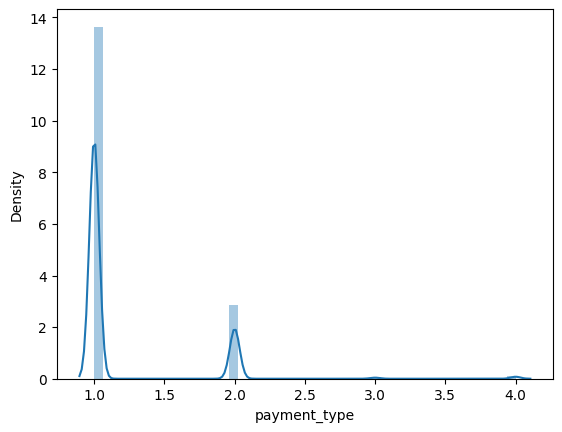

In [396]:
# Analyse the distribution of different payment types (payment_type).

sns.distplot(df_fa['payment_type'])
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [398]:
#!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [402]:
os.chdir(os.getcwd() + '/../taxi_zones/')

In [403]:
os.getcwd()

'C:\\Users\\Lenovo\\Pictures\\EPGML\\NYC_ASSIGNMENT\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\taxi_zones'

In [404]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file("taxi_zones.shp") # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

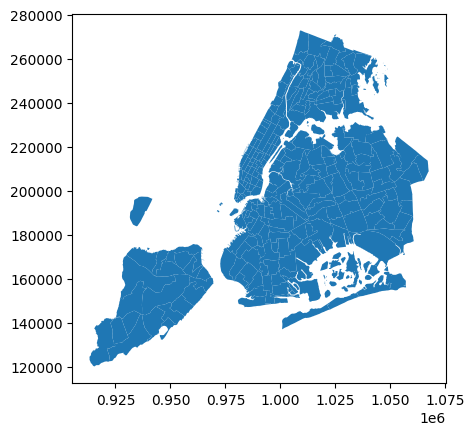

In [406]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [410]:
# Merge zones and trip records using locationID and PULocationID
df_zone = pd.merge(df_fa, zones, left_on = 'PULocationID', right_on = 'LocationID', how = 'inner')
df_zone.head(5)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4           7.10         1.0                  N           246            37   

   payment_type  ...  pick_up_month  pick_up_quarter  trip_duration  OBJECTID  \
0             2  ...              1                1          957.0       138   
1             1  ...              1                1          305.0       161   
2             2  ...              1                1          633.0       237   
3             2  ...              1                1          325.0       143   
4             1  ...              1                1         2017.0       246   

   Shape_Leng  Shape_Area                       zone  LocationID    borough  \
0    0.107467    0.000537          LaGuardia Airport         138     Queens   
1    0.035804    0.000072             Midtown Center         161  Manhattan   
2    0.042213    0.000096      Upper East Side South         237  Manhattan   
3    0.054180    0.000151        Lincoln Square West         143  Manhattan   
4    0.069467    0.000281  West Chelsea/Hudson Yards         246  Manhattan   

                                            geometry  
0  MULTIPOLYGON (((1019904.219 225677.983, 102031...  
1  POLYGON ((991081.026 214453.698, 990952.644 21...  
2  POLYGON ((993633.442 216961.016, 993507.232 21...  
3  POLYGON ((989338.1 223572.253, 989368.225 2235...  
4  POLYGON ((983031.177 217138.506, 983640.32 216...  

[5 rows x 31 columns]

In [411]:
df_zone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358546 entries, 0 to 358545
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               358546 non-null  int64         
 1   tpep_pickup_datetime   358546 non-null  datetime64[us]
 2   tpep_dropoff_datetime  358546 non-null  datetime64[us]
 3   passenger_count        358546 non-null  float64       
 4   trip_distance          358546 non-null  float64       
 5   RatecodeID             358546 non-null  float64       
 6   store_and_fwd_flag     358546 non-null  object        
 7   PULocationID           358546 non-null  int64         
 8   DOLocationID           358546 non-null  int64         
 9   payment_type           358546 non-null  int64         
 10  fare_amount            358546 non-null  float64       
 11  extra                  358546 non-null  float64       
 12  mta_tax                358546 non-null  floa

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [416]:
# Group data by location and calculate the number of trips
num_of_trips = df_zone.groupby('zone')['VendorID'].count().reset_index(name='num_of_trips')


In [419]:
num_of_trips

zone  num_of_trips
0    Allerton/Pelham Gardens             9
1              Alphabet City           351
2              Arden Heights             2
3    Arrochar/Fort Wadsworth             4
4                    Astoria           144
..                       ...           ...
232       Woodlawn/Wakefield             7
233                 Woodside            61
234       World Trade Center          1871
235           Yorkville East          4607
236           Yorkville West          6910

[237 rows x 2 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [420]:
# Merge trip counts back to the zones GeoDataFrame
zones_trip = pd.merge(zones, num_of_trips, on='zone', how = 'inner')



In [421]:
zones_trip.head(5)

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
2         4    0.043567    0.000112            Alphabet City           4   
3         5    0.092146    0.000498            Arden Heights           5   
4         6    0.150491    0.000606  Arrochar/Fort Wadsworth           6   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
2      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
3  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   
4  Staten Island  POLYGON ((966568.747 158679.855, 966615.256 15...   

   num_of_trips  
0             8  
1             9  
2           351  
3             2  
4             4

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

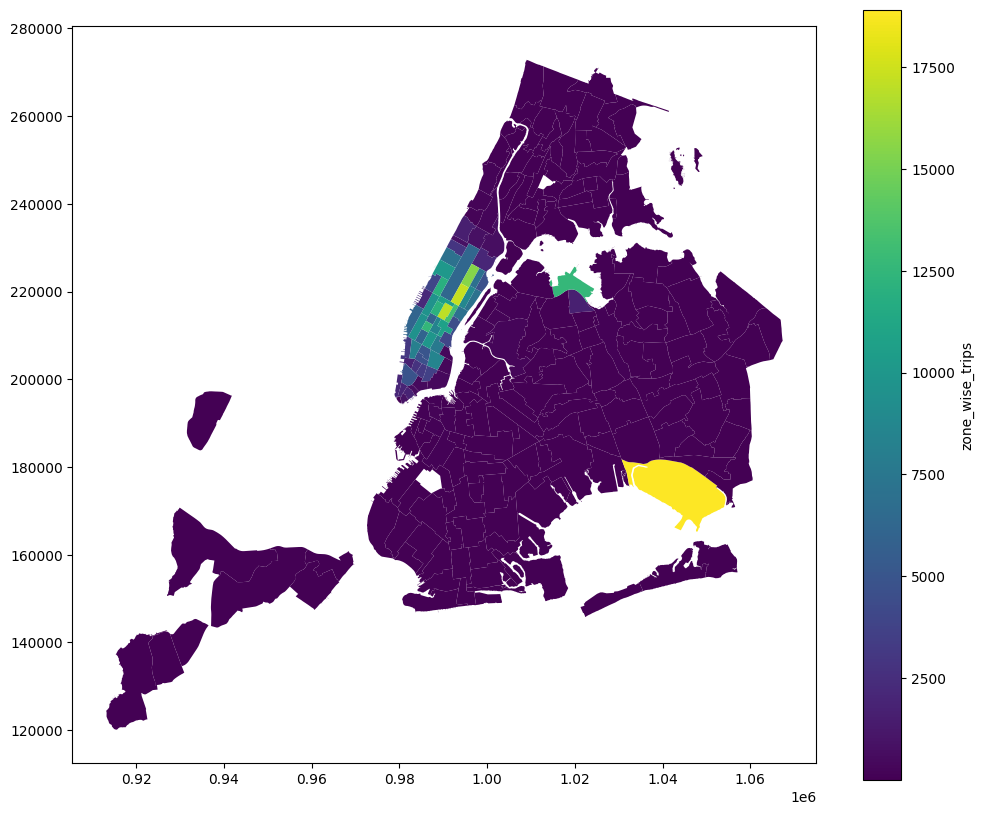

In [424]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones_trip.plot(column = 'num_of_trips', ax=ax, legend = True, legend_kwds = {'label': "zone_wise_trips", 'orientation': "vertical"})
plt.show()

In [426]:
# can you try displaying the zones DF sorted by the number of trips?
zones_trip.sort_values(by='num_of_trips', ascending=False)


OBJECTID  Shape_Leng  Shape_Area                       zone  LocationID  \
116       132    0.245479    0.002038                JFK Airport         132   
213       237    0.042213    0.000096      Upper East Side South         237   
144       161    0.035804    0.000072             Midtown Center         161   
212       236    0.044252    0.000103      Upper East Side North         236   
145       162    0.035270    0.000048               Midtown East         162   
..        ...         ...         ...                        ...         ...   
182       204    0.101912    0.000641          Rossville/Woodrow         204   
171       192    0.111965    0.000374            Queensboro Hill         192   
88         96    0.185180    0.000548  Forest Park/Highland Park          96   
92        101    0.101710    0.000452                  Glen Oaks         101   
191       214    0.135300    0.000812   South Beach/Dongan Hills         214   

           borough                                           geometry  \
116         Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
213      Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
144      Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
212      Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
145      Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
..             ...                                                ...   
182  Staten Island  POLYGON ((927766.539 141772.465, 927864.475 14...   
171         Queens  POLYGON ((1033459.319 212522.305, 1033758.551 ...   
88          Queens  POLYGON ((1029152.314 197379.274, 1029238.052 ...   
92          Queens  POLYGON ((1066997.47 212947.337, 1067047.985 2...   
191  Staten Island  POLYGON ((960669.201 156319.132, 960902.551 15...   

     num_of_trips  
116         18916  
213         17279  
144         17040  
212         15448  
145         13153  
..            ...  
182             1  
171             1  
88              1  
92              1  
191             1  

[238 rows x 8 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [430]:
df_zone.head(1)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   

   payment_type  ...  pick_up_month  pick_up_quarter  trip_duration  OBJECTID  \
0             2  ...              1                1          957.0       138   

   Shape_Leng  Shape_Area               zone  LocationID  borough  \
0    0.107467    0.000537  LaGuardia Airport         138   Queens   

                                            geometry  
0  MULTIPOLYGON (((1019904.219 225677.983, 102031...  

[1 rows x 31 columns]

In [505]:
# Find routes which have the slowest speeds at different times of the day
df_zone = df_zone.loc[df_zone['trip_distance'] >= 1]
avg_trip_dur = df_zone.groupby('pickup_hour')['trip_duration'].mean().reset_index(name='trip_duration')
avg_trip_dist = df_zone.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])['trip_distance'].mean().reset_index(name='trip_distance')

route_df = pd.merge(avg_trip_dist, avg_trip_dur, on='pickup_hour', how='inner')

route_df['avg_speed'] = (route_df['trip_distance'] * 60 * 60 )/route_df['trip_duration']

print(route_df['avg_speed'].describe())
speed_10 = np.quantile(route_df['avg_speed'], 0.10)
print(speed_10)



count    66216.000000
mean        16.150673
std         14.966442
min          2.495526
25%          5.967743
50%         10.700039
75%         20.455205
max        189.320037
Name: avg_speed, dtype: float64
4.22384048693783


In [510]:
slow_routes = route_df.loc[route_df['avg_speed'] < 3]

In [821]:
route_df.loc[route_df['avg_speed'] < speed_10][0:30].sort_values(by = 'avg_speed')

PULocationID  DOLocationID  pickup_hour  trip_distance  trip_duration  \
9               4             4           15          1.130    1457.007491   
73              4           107           16          1.130    1449.596926   
158             4           211           16          1.200    1449.596926   
241             7             7           14          1.200    1412.201102   
87              4           114           17          1.160    1346.611242   
86              4           114           10          1.050    1186.386913   
74              4           107           17          1.235    1346.611242   
88              4           114           19          1.060    1150.932221   
52              4            79           18          1.130    1223.268775   
72              4           107           12          1.190    1286.772840   
116             4           148           22          1.025    1085.103570   
161             4           224           17          1.300    1346.611242   
238             7             7            5          1.100    1110.515113   
8               3           254           14          1.400    1412.201102   
240             7             7           13          1.400    1394.594874   
54              4            79           23          1.090    1074.371226   
216             4           249            8          1.200    1166.544435   
239             7             7            9          1.220    1184.121220   
53              4            79           22          1.120    1085.103570   
79              4           107           23          1.110    1074.371226   
82              4           113            9          1.230    1184.121220   
159             4           211           19          1.200    1150.932221   
49              4            79            0          1.080    1030.892509   
243             7             7           18          1.320    1223.268775   
78              4           107           22          1.200    1085.103570   
157             4           211            9          1.330    1184.121220   
71              4           107           11          1.430    1266.810619   
117             4           148           23          1.230    1074.371226   
184             4           232           13          1.600    1394.594874   
113             4           144           23          1.240    1074.371226   

     avg_speed  
9     2.792024  
73    2.806297  
158   2.980139  
241   3.059054  
87    3.101118  
86    3.186144  
74    3.301621  
88    3.315573  
52    3.325516  
72    3.329259  
116   3.400597  
161   3.475391  
238   3.565913  
8     3.568897  
240   3.613953  
54    3.652369  
216   3.703245  
239   3.709080  
53    3.715774  
79    3.719385  
82    3.739482  
159   3.753479  
49    3.771489  
243   3.884674  
78    3.981187  
157   4.043505  
71    4.063749  
117   4.121480  
184   4.130232  
113   4.154988

In [511]:
slow_routes.groupby(['PULocationID', 'DOLocationID'])['avg_speed'].mean()

PULocationID  DOLocationID
4             4               2.792024
              107             2.806297
              211             2.980139
7             146             2.843252
              226             2.932309
                                ...   
262           263             2.634952
263           140             2.778359
              141             2.954000
              236             2.929458
              262             2.980139
Name: avg_speed, Length: 310, dtype: float64

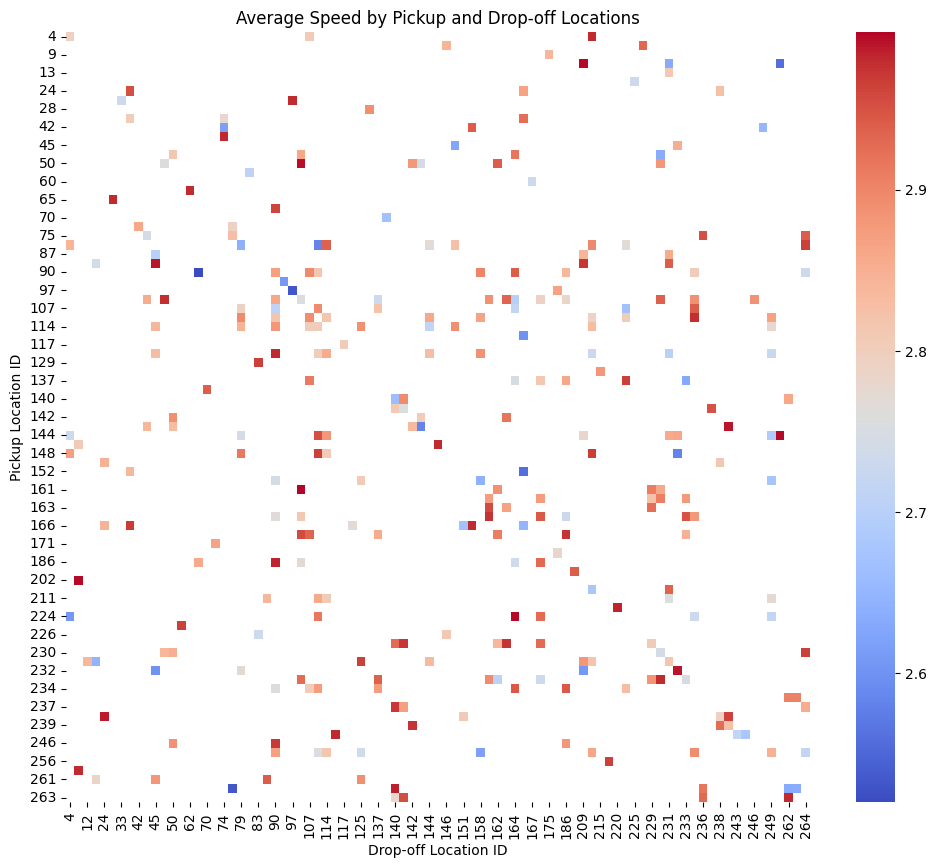

In [512]:

grouped_data = slow_routes.groupby(['PULocationID', 'DOLocationID'])['avg_speed'].mean().reset_index()

pivot_table = grouped_data.pivot(index='PULocationID', columns=['DOLocationID'], values='avg_speed')

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=False, cmap='coolwarm' )
plt.title('Average Speed by Pickup and Drop-off Locations')
plt.xlabel('Drop-off Location ID')
plt.ylabel('Pickup Location ID')
plt.show()

How does identifying high-traffic, high-demand routes help us?

We can analyse revenue of high-traffic and high-demand routes to plan for better avalaiblity 

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [521]:
# Visualise the number of trips per hour and find the busiest hour
num_trips = df_fa.groupby('pickup_hour')['VendorID'].size().reset_index(name='num_of_trips')
num_trips
sns.barplot(data = num_trips, x= 'pickup_hour', y = 'num_of_trips')
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

I did not take the fraction my dataframe has the actual value so no need to scale.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [526]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 1

hour_trips = df_fa.groupby('pickup_hour')['VendorID'].size() * sample_fraction 
hour_trips.sort_values(ascending=False)[:5]

pickup_hour
18    25563
17    24427
19    22965
15    22570
16    22539
Name: VendorID, dtype: int64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

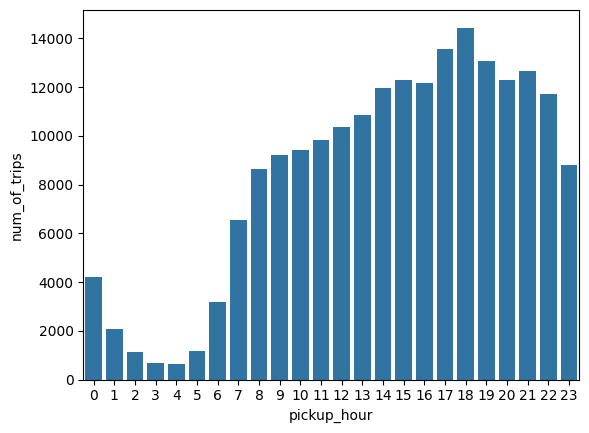

In [531]:
# Compare traffic trends for the week days and weekends

weekday_traffic = df_zone.loc[df_zone['pickup_day'] < 5 ]
weekday_hour_traffic = weekday_traffic.groupby('pickup_hour')['VendorID'].size().reset_index(name='num_of_trips')

sns.barplot(data = weekday_hour_traffic, x= 'pickup_hour', y = 'num_of_trips')
plt.show()

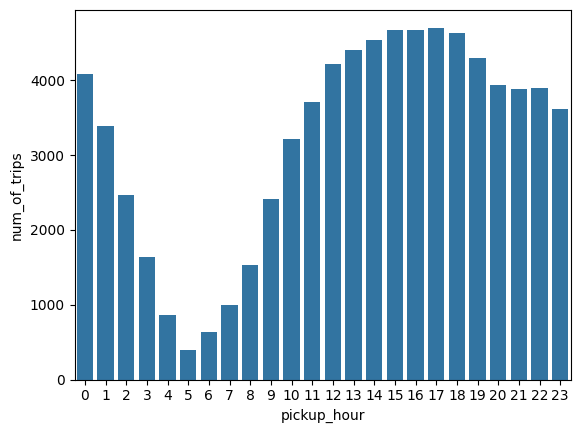

In [532]:
weekend_traffic = df_zone.loc[df_zone['pickup_day'] >= 5 ]
weekend_hour_traffic = weekend_traffic.groupby('pickup_hour')['VendorID'].size().reset_index(name='num_of_trips')

sns.barplot(data = weekend_hour_traffic, x= 'pickup_hour', y = 'num_of_trips')
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

On weekdays hours 5pm and 6 pm are buisest. for weekends hours 3-6 PM are busiest. 
It helps us plan right and better avialablity of taxis. 

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [638]:
zone_names = dict(zip(zones['LocationID'], zones['zone']))

In [639]:
df_zone['pickup_zone'] = df['PULocationID'].map(zone_names)

In [640]:
df_zone['dropoff_zone'] = df['DOLocationID'].map(zone_names)

In [643]:
df_zone.head(1)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   

   payment_type  ...  OBJECTID  Shape_Leng  Shape_Area               zone  \
0             2  ...       138    0.107467    0.000537  LaGuardia Airport   

   LocationID  borough                                           geometry  \
0         138   Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...   

   drop_off_hour        pickup_zone               dropoff_zone  
0              0  LaGuardia Airport  Williamsburg (South Side)  

[1 rows x 34 columns]

In [644]:
# Find top 10 pickup and dropoff zones

zone_hour_pickup_traffic = df_zone.groupby(['pickup_zone', 'pickup_hour'])['VendorID'].size().reset_index(name='num_of_trips')
top_10_hourly_pickup_zones = zone_hour_pickup_traffic.groupby(['pickup_zone'])['num_of_trips'].max().sort_values(ascending=False)[:10]
top_10_hourly_pickup_zones_list = top_10_hourly_pickup_zones.reset_index(name='num_of_pickups')['pickup_zone']
top_10_hourly_pickup_zones_list

0                     JFK Airport
1           Upper East Side South
2                  Midtown Center
3           Upper East Side North
4                    Midtown East
5             Lincoln Square East
6       Times Sq/Theatre District
7    Penn Station/Madison Sq West
8               LaGuardia Airport
9                   Midtown North
Name: pickup_zone, dtype: object

In [645]:
df_zone['drop_off_hour'] = df['tpep_dropoff_datetime'].dt.hour
zone_hour_drop_traffic = df_zone.groupby(['dropoff_zone', 'drop_off_hour'])['VendorID'].size().reset_index(name='num_of_trips')
top_10_hourly_drop_zones = zone_hour_drop_traffic.groupby(['dropoff_zone'])['num_of_trips'].max().sort_values(ascending=False)[:10]
top_10_hourly_drop_zones_list = (top_10_hourly_drop_zones.reset_index(name ='num_of_dropoffs')['dropoff_zone'])
top_10_hourly_drop_zones_list

0        Upper East Side North
1        Upper East Side South
2               Midtown Center
3    Times Sq/Theatre District
4          Lincoln Square East
5        Upper West Side South
6              Lenox Hill West
7                 Clinton East
8                 Midtown East
9                  Murray Hill
Name: dropoff_zone, dtype: object

In [646]:
top_pickup_zone_df = df_zone[df_zone['pickup_zone'].isin(top_10_hourly_pickup_zones_list)]

top_dropoff_zone_df = df_zone[df_zone['dropoff_zone'].isin(top_10_hourly_drop_zones_list)]


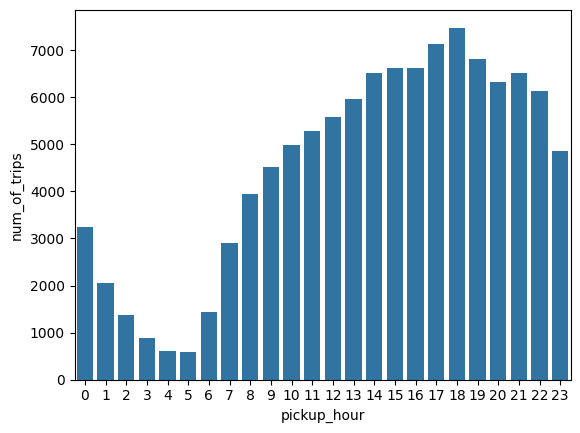

In [647]:
#Show pickup and dropoff trends in these zones
sns.barplot(top_pickup_zone_df.groupby('pickup_hour')['VendorID'].size())
plt.ylabel('num_of_trips')
plt.show()


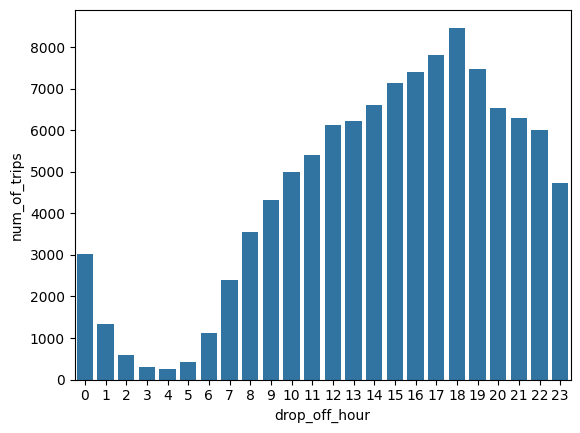

In [648]:

sns.barplot(top_pickup_zone_df.groupby('drop_off_hour')['VendorID'].size())
plt.ylabel('num_of_trips')
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [807]:
pickup_df = df_zone.groupby(['pickup_zone'])['VendorID'].size().reset_index(name="num_pickup_trips")
dropoff_df = df_zone.groupby(['dropoff_zone'])['VendorID'].size().reset_index(name="num_drop_off_trips")
#pick-up and drop-off merged dataframe 
pu_do_merged = pd.merge(pickup_df, dropoff_df, left_on='pickup_zone', right_on= 'dropoff_zone', how='inner')

In [809]:
pu_do_merged['ratio'] = round((pu_do_merged['num_pickup_trips']/pu_do_merged['num_drop_off_trips']), 2)

In [810]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
#top 10 
pu_do_merged[['pickup_zone', 'num_pickup_trips', 'num_drop_off_trips','ratio']].sort_values(by='ratio', ascending=False)[:10]

pickup_zone  num_pickup_trips  num_drop_off_trips  ratio
61                  East Elmhurst              1246                 150   8.31
111                   JFK Airport             14570                3045   4.78
120             LaGuardia Airport              9531                3263   2.92
164  Penn Station/Madison Sq West              9576                6186   1.55
37                   Central Park              4751                3383   1.40
97        Greenwich Village South              3595                2670   1.35
222                  West Village              6247                4637   1.35
143                  Midtown East             10053                7938   1.27
142                Midtown Center             13031               10869   1.20
208                      Union Sq              7609                6430   1.18

In [778]:
# bottom 10 
pu_do_merged[['pickup_zone', 'num_pickup_trips', 'num_drop_off_trips','ratio']].sort_values(by='ratio', ascending=True)[:10]

pickup_zone  num_pickup_trips  num_drop_off_trips  ratio
153      Newark Airport                 7                 765   0.01
115          Kensington                 2                  70   0.03
90            Glen Oaks                 1                  24   0.04
229     Windsor Terrace                 4                 109   0.04
91             Glendale                 2                  53   0.04
31       Bushwick South                13                 267   0.05
25           Bronx Park                 1                  20   0.05
178    Roosevelt Island                 8                 154   0.05
95           Greenpoint                29                 629   0.05
28   Brooklyn Navy Yard                 2                  33   0.06

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [675]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_pickup_tour = df_zone[(df_zone['pickup_hour'] >= 23) | (df_zone['pickup_hour'] <= 5)]

In [676]:
night_dropoff_tour = df_zone[(df_zone['drop_off_hour'] >= 23) | (df_zone['drop_off_hour'] <= 5)]

In [677]:
# top 10 night pickup zones
night_pickup_tour.groupby(['pickup_zone'])['VendorID'].size().sort_values(ascending=False)[:10]

pickup_zone
JFK Airport                     1750
Midtown Center                  1711
Upper East Side South           1662
Upper East Side North           1468
Midtown East                    1236
LaGuardia Airport               1203
Times Sq/Theatre District       1188
Penn Station/Madison Sq West    1156
Lincoln Square East             1156
Midtown North                   1067
Name: VendorID, dtype: int64

In [678]:
#top 10 night drop off zones
night_dropoff_tour.groupby(['dropoff_zone'])['VendorID'].size().sort_values(ascending=False)[:10]

dropoff_zone
East Village                 1399
Clinton East                 1152
Murray Hill                  1064
East Chelsea                  945
Gramercy                      918
Lenox Hill West               890
Yorkville West                875
West Village                  767
Times Sq/Theatre District     762
Upper East Side North         755
Name: VendorID, dtype: int64

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [679]:
# Filter for night hours (11 PM to 5 AM)
night_pickup_tour.groupby('pickup_hour')['total_amount'].sum().reset_index(name ="Revenue sum")


pickup_hour  Revenue sum
0            0    267890.84
1            1    160318.10
2            2     99922.37
3            3     66379.57
4            4     54823.21
5            5     69731.04
6           23    419508.22

In [790]:
sns.barplot(night_pickup_tour.groupby('pickup_hour')['total_amount'].sum())
plt.show()

In [680]:
#filter day tour
day_pickup_tour = df_zone[~ df_zone.index.isin(night_pickup_tour.index)]

In [681]:
day_pickup_tour.groupby('pickup_hour')['total_amount'].sum().reset_index(name ="Revenue sum")


pickup_hour  Revenue sum
0             6    139521.36
1             7    233210.48
2             8    307706.14
3             9    360329.61
4            10    391925.59
5            11    434220.15
6            12    474789.71
7            13    513566.78
8            14    571994.93
9            15    587286.97
10           16    610159.07
11           17    626553.08
12           18    612994.17
13           19    569051.00
14           20    511699.06
15           21    521475.21
16           22    506431.14

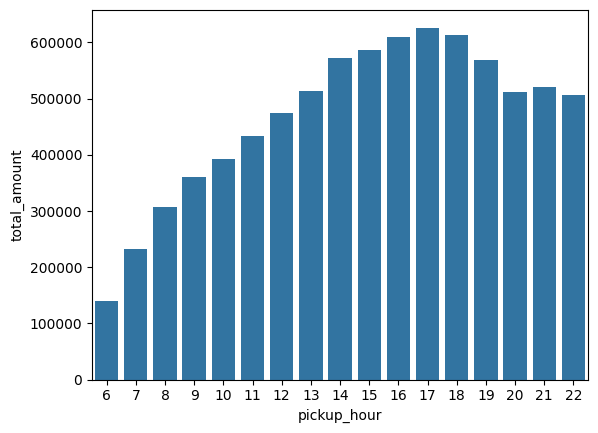

In [792]:
sns.barplot(day_pickup_tour.groupby('pickup_hour')['total_amount'].sum())
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [684]:
# Analyse the fare per mile per passenger for different passenger counts
df_zone['fair_per_mile_pass'] = round((df_zone['total_amount']/(df_zone['trip_distance'] * df_zone['passenger_count'])), 2)

df_zone.groupby('passenger_count')['fair_per_mile_pass'].mean()


passenger_count
1.0    10.371761
2.0     5.033619
3.0     3.382915
4.0     2.538569
5.0     2.057488
6.0     1.719482
Name: fair_per_mile_pass, dtype: float64

In [793]:
sns.barplot(df_zone.groupby('passenger_count')['fair_per_mile_pass'].mean())
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

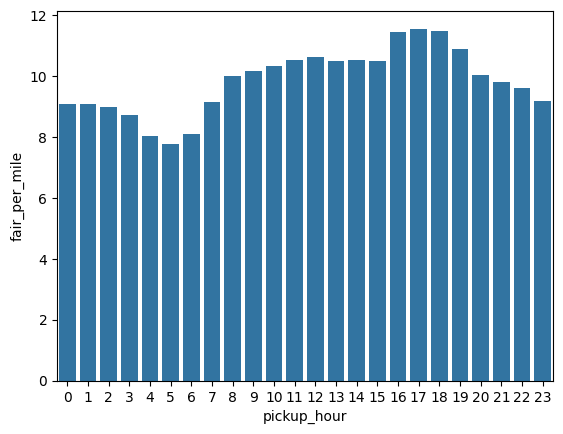

In [686]:
# Compare the average fare per mile for different days and for different times of the day
df_zone['fair_per_mile'] = round((df_zone['total_amount']/(df_zone['trip_distance'])), 2)

sns.barplot(df_zone.groupby('pickup_hour')['fair_per_mile'].mean())
plt.show()


In [687]:
sns.barplot(df_zone.groupby('pickup_day')['fair_per_mile'].mean())
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

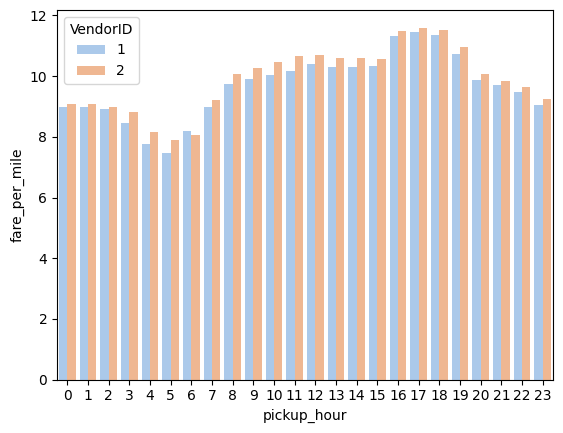

In [696]:
# Compare fare per mile for different vendors

fair_per_mile = df_zone.groupby(['VendorID', 'pickup_hour'])['fair_per_mile'].mean().reset_index(name='fare_per_mile')

sns.barplot(data=fair_per_mile, x='pickup_hour', y = 'fare_per_mile', hue='VendorID', palette = 'pastel')
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [699]:
# Defining distance tiers
dist_upto_2 = df_zone[df_zone['trip_distance'] <= 2 ]
dist_2_to_5 = df_zone[df_zone['trip_distance'] > 2  & (df_zone['trip_distance'] <= 5)]
dist_more_than_5 = df_zone[df_zone['trip_distance'] > 5]


In [700]:
# fair comparison for upto 2 miles
fair_per_mile = dist_upto_2.groupby(['VendorID', 'pickup_hour'])['fair_per_mile'].mean().reset_index(name='fare_per_mile')

sns.barplot(data=fair_per_mile, x='pickup_hour', y = 'fare_per_mile', hue='VendorID', palette = 'pastel')
plt.show()

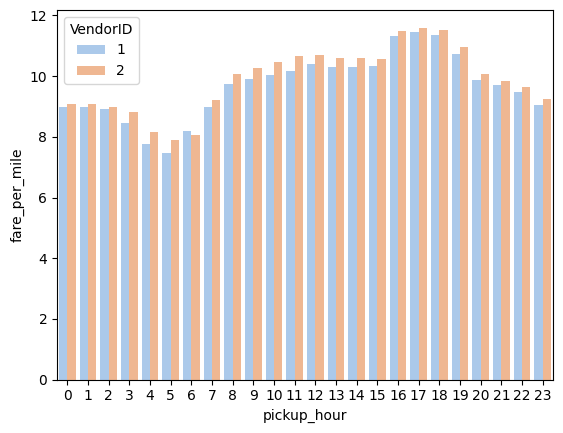

In [701]:
# fair comparison for 2 to 5 miles
fair_per_mile = dist_2_to_5.groupby(['VendorID', 'pickup_hour'])['fair_per_mile'].mean().reset_index(name='fare_per_mile')

sns.barplot(data=fair_per_mile, x='pickup_hour', y = 'fare_per_mile', hue='VendorID', palette = 'pastel')
plt.show()

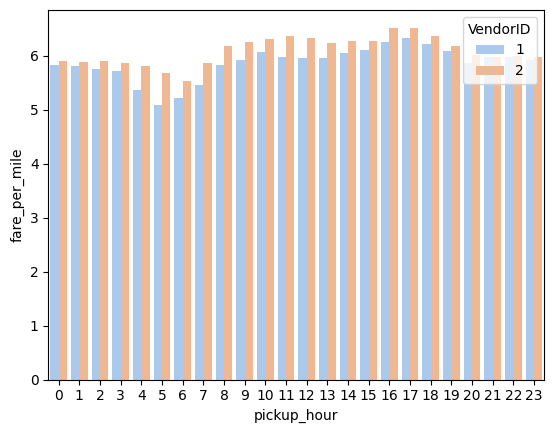

In [703]:
# fair comparison for more than  5 miles
fair_per_mile = dist_more_than_5.groupby(['VendorID', 'pickup_hour'])['fair_per_mile'].mean().reset_index(name='fare_per_mile')

sns.barplot(data=fair_per_mile, x='pickup_hour', y = 'fare_per_mile', hue='VendorID', palette = 'pastel')
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [729]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df_zone_cc = df_zone[df_zone['payment_type'] == 1]
df_zone_cc['tip_perc'] =  round(((df_zone_cc['tip_amount'] * 100)/df_zone_cc['fare_amount']), 2)


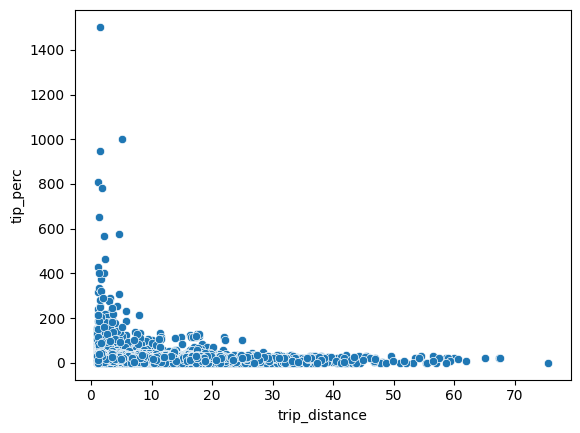

In [731]:
# tip perc vs trip distance
sns.scatterplot(data = df_zone_cc, x = df_zone_cc['trip_distance'], y = df_zone_cc['tip_perc'])
plt.show()

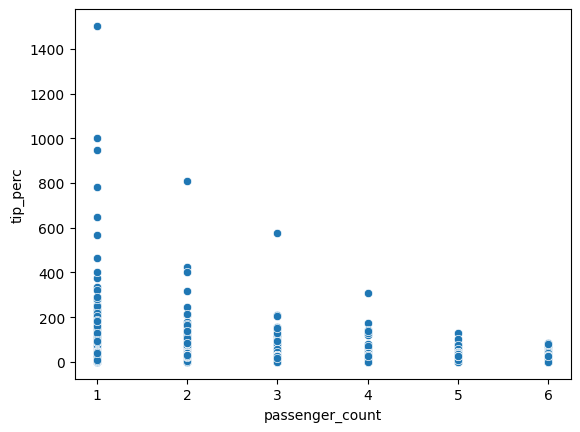

In [732]:
#tip perc vs passenger_count
sns.scatterplot(data = df_zone_cc, x = df_zone_cc['passenger_count'], y = df_zone_cc['tip_perc'])
plt.show()

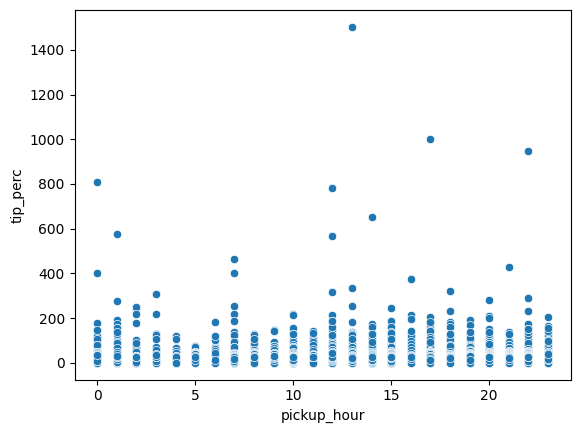

In [734]:
# tip_perc vs hour of the day 
sns.scatterplot(data = df_zone_cc, x = df_zone_cc['pickup_hour'], y = df_zone_cc['tip_perc'])
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [735]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
df_zone_cc[df_zone_cc['tip_perc'] < 10].head(10)[df.columns]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
21          2  2023-01-01 00:13:02   2023-01-01 00:26:20              1.0   
22          1  2023-01-01 00:18:33   2023-01-01 00:54:44              1.0   
34          2  2023-01-01 00:36:08   2023-01-01 00:49:39              5.0   
41          1  2023-01-01 00:39:27   2023-01-01 00:50:25              2.0   
64          1  2023-01-01 01:58:23   2023-01-01 02:09:53              2.0   
85          2  2023-01-01 01:03:39   2023-01-01 01:30:30              1.0   
121         2  2023-01-01 02:57:29   2023-01-01 03:25:44              1.0   
130         2  2023-01-01 02:21:40   2023-01-01 02:39:09              1.0   
146         2  2023-01-01 03:13:52   2023-01-01 03:28:36              1.0   
147         1  2023-01-01 03:11:25   2023-01-01 03:20:21              1.0   

     trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
21            1.46         1.0                  N           158           107   
22           21.00         2.0                  N           132           238   
34            1.08         1.0                  N           162           164   
41            4.70         1.0                  N           140           232   
64            1.50         1.0                  N           249           107   
85            3.46         1.0                  N            79            50   
121           7.40         1.0                  N           129            74   
130           3.57         1.0                  N           166            24   
146           3.00         1.0                  N           229            68   
147           1.80         1.0                  N           141           239   

     payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
21              1  ...         1.0          0.00                    1.0   
22              1  ...         0.0          6.55                    1.0   
34              1  ...         1.0          0.00                    1.0   
41              1  ...         2.0          0.00                    1.0   
64              1  ...         1.0          0.00                    1.0   
85              1  ...         1.0          0.00                    1.0   
121             1  ...         2.0          0.00                    1.0   
130             1  ...         1.0          0.00                    1.0   
146             1  ...         1.0          0.00                    1.0   
147             1  ...         1.0          0.00                    1.0   

     total_amount  congestion_surcharge  airport_fee  pickup_hour  pickup_day  \
21           19.5                   2.5         0.00            0           6   
22           81.8                   2.5         1.25            0           6   
34           18.8                   2.5         0.00            0           6   
41           27.5                   2.5         0.00            0           6   
64           17.4                   2.5         0.00            1           6   
85           30.0                   2.5         0.00            1           6   
121          42.2                   2.5         0.00            2           6   
130          24.0                   0.0         0.00            2           6   
146          23.0                   2.5         0.00            3           6   
147          16.7                   2.5         0.00            3           6   

     pick_up_month  trip_duration  
21               1          798.0  
22               1         2171.0  
34               1          811.0  
41               1          658.0  
64               1          690.0  
85               1         1611.0  
121              1         1695.0  
130              1         1049.0  
146              1          884.0  
147              1          536.0  

[10 rows x 23 columns]

In [736]:
df_zone_cc[df_zone_cc['tip_perc'] > 25].head(10)[df.columns]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1          2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
5          2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
6          2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
10         2  2023-01-01 00:24:48   2023-01-01 00:45:04              1.0   
12         2  2023-01-01 00:13:02   2023-01-01 00:38:02              1.0   
13         2  2023-01-01 00:06:39   2023-01-01 00:25:25              1.0   
16         2  2023-01-01 00:21:44   2023-01-01 00:36:40              1.0   
23         2  2023-01-01 00:24:12   2023-01-01 00:48:09              2.0   
33         1  2023-01-01 00:43:36   2023-01-01 00:54:58              1.0   
35         1  2023-01-01 00:05:27   2023-01-01 00:09:40              2.0   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
1            1.24         1.0                  N           161           237   
5            1.59         1.0                  N            79           164   
6            3.16         1.0                  N            79           256   
10           2.78         1.0                  N            79           186   
12           4.37         1.0                  N           142           148   
13           2.43         1.0                  N           144           186   
16           2.95         1.0                  N           164           236   
23           7.07         1.0                  N           144             7   
33           2.40         1.0                  N           141           238   
35           1.20         1.0                  N           162           141   

    payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
1              1  ...        2.58           0.0                    1.0   
5              1  ...        3.28           0.0                    1.0   
6              1  ...        6.02           0.0                    1.0   
10             1  ...        4.96           0.0                    1.0   
12             1  ...        9.12           0.0                    1.0   
13             1  ...        4.68           0.0                    1.0   
16             1  ...        5.68           0.0                    1.0   
23             1  ...        9.35           0.0                    1.0   
33             1  ...        3.80           0.0                    1.0   
35             1  ...        2.55           0.0                    1.0   

    total_amount  congestion_surcharge  airport_fee  pickup_hour  pickup_day  \
1          15.48                   2.5          0.0            0           6   
5          19.68                   2.5          0.0            0           6   
6          30.12                   2.5          0.0            0           6   
10         29.76                   2.5          0.0            0           6   
12         39.52                   2.5          0.0            0           6   
13         28.08                   2.5          0.0            0           6   
16         28.38                   2.5          0.0            0           6   
23         46.75                   2.5          0.0            0           6   
33         23.00                   2.5          0.0            0           6   
35         15.45                   2.5          0.0            0           6   

    pick_up_month  trip_duration  
1               1          305.0  
5               1          631.0  
6               1          953.0  
10              1         1216.0  
12              1         1500.0  
13              1         1126.0  
16              1          896.0  
23              1         1437.0  
33              1          682.0  
35              1          253.0  

[10 rows x 23 columns]

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

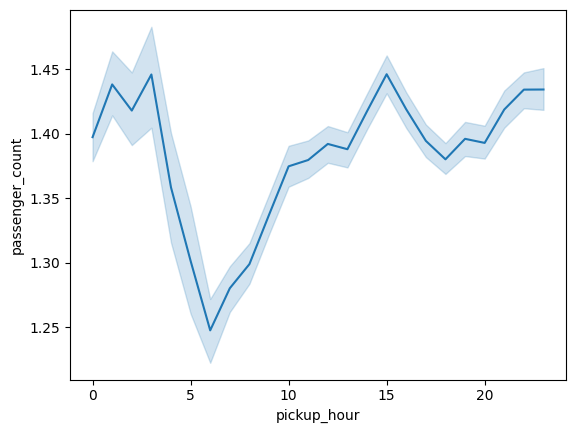

In [739]:
# See how passenger count varies across hours and days

sns.lineplot(data = df_zone, x = 'pickup_hour', y = 'passenger_count')
plt.show()


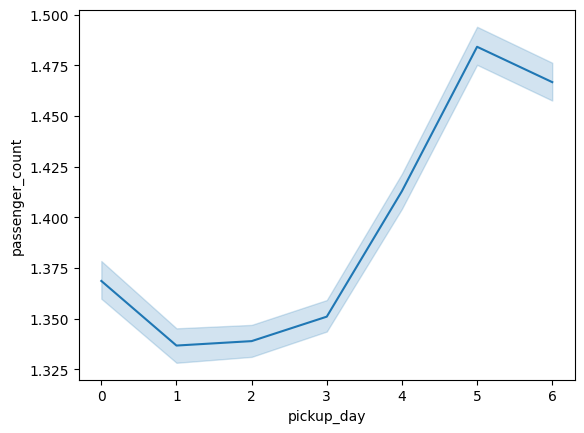

In [740]:
# See how passenger count varies across  days

sns.lineplot(data = df_zone, x = 'pickup_day', y = 'passenger_count')
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

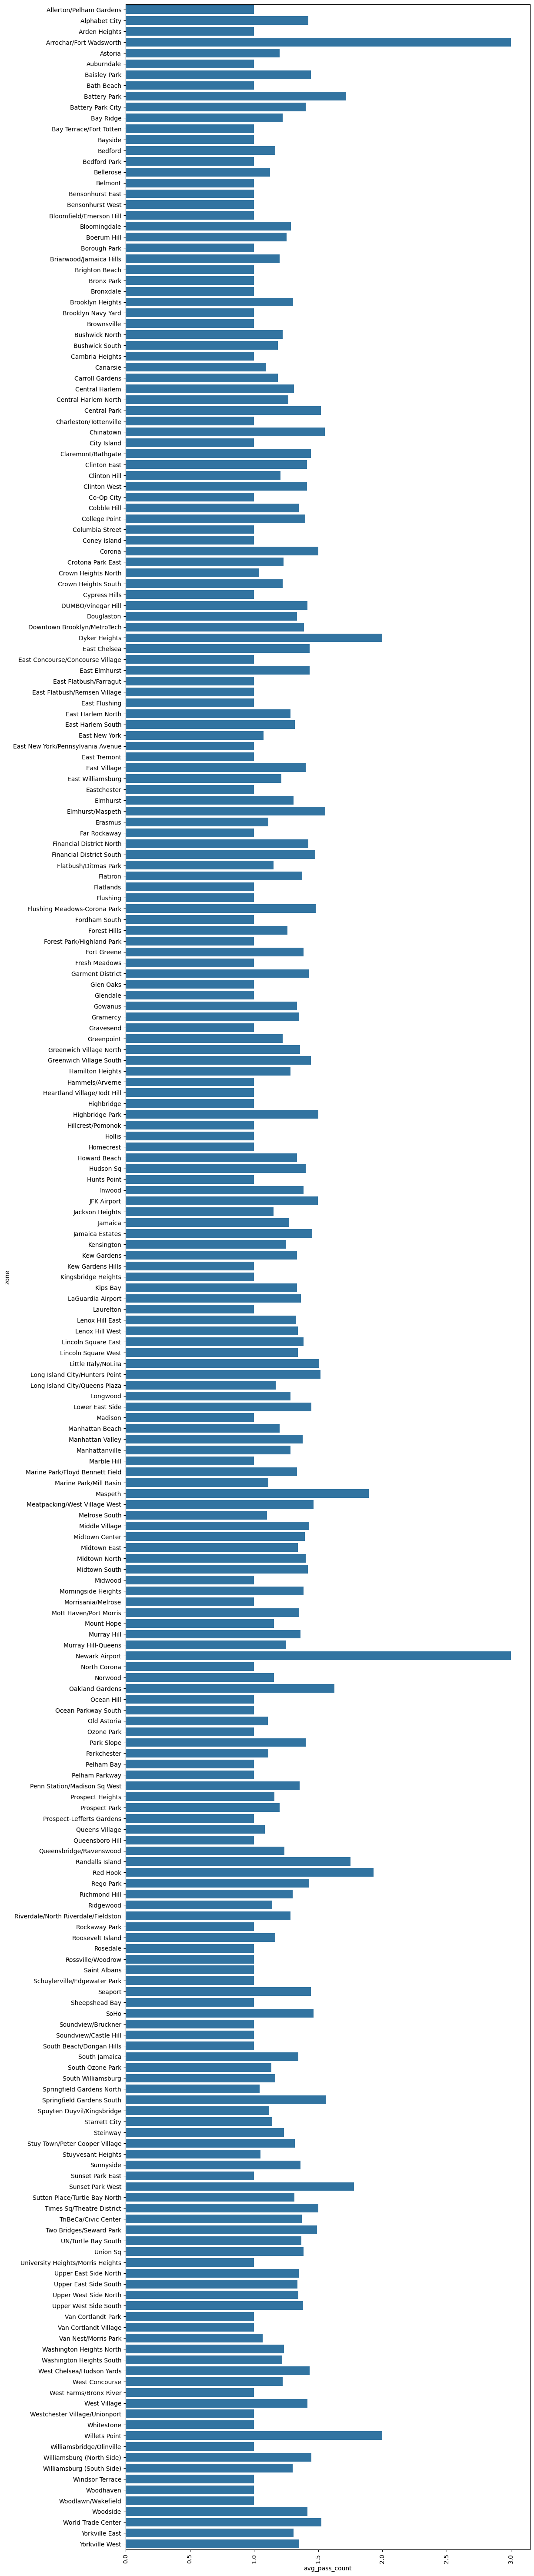

In [805]:
# How does passenger count vary across zones
pass_count = df_zone.groupby('zone')['passenger_count'].mean().reset_index(name = 'avg_pass_count')

plt.figure(figsize=(12, 76))
sns.barplot(data=pass_count , x= 'avg_pass_count', y='zone'
plt.xticks(rotation = 90)
plt.show()

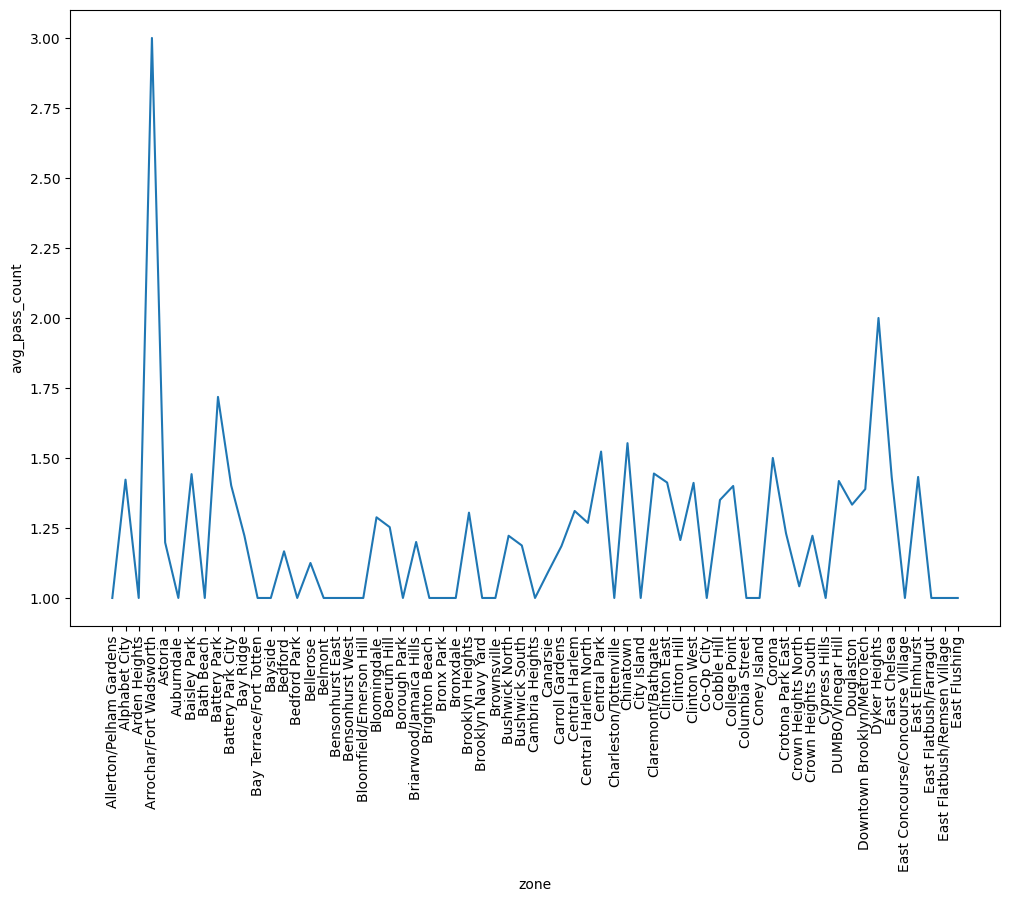

In [806]:
pass_count_1 = pass_count.iloc[0:65]

plt.figure(figsize=(12, 8))
sns.lineplot(data=pass_count_1 , x= 'zone', y='avg_pass_count')
plt.xticks(rotation = 90)
plt.show()

In [798]:
pass_count_2 = pass_count.iloc[65:130]

plt.figure(figsize=(12, 8))
sns.lineplot(data=pass_count_2 , x= 'zone', y='avg_pass_count')
plt.xticks(rotation = 90)
plt.show()

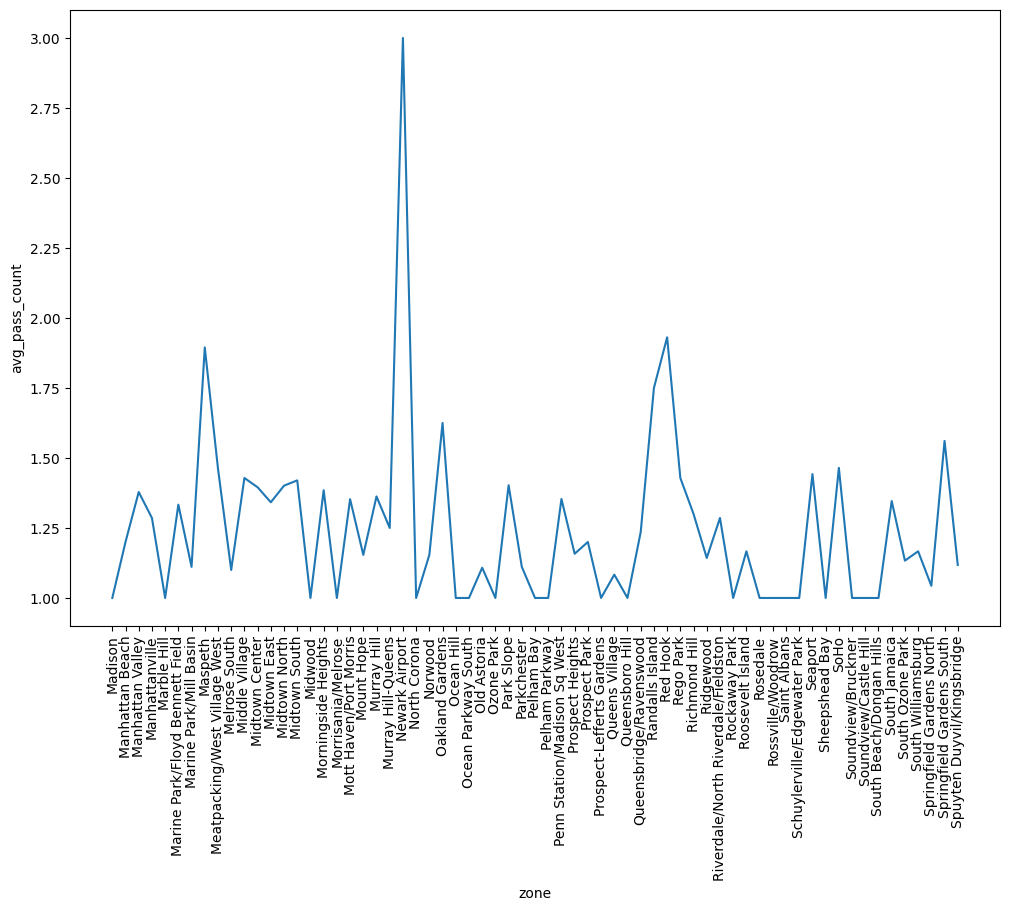

In [799]:
pass_count_3 = pass_count.iloc[130:195]

plt.figure(figsize=(12, 8))
sns.lineplot(data=pass_count_3 , x= 'zone', y='avg_pass_count')
plt.xticks(rotation = 90)
plt.show()

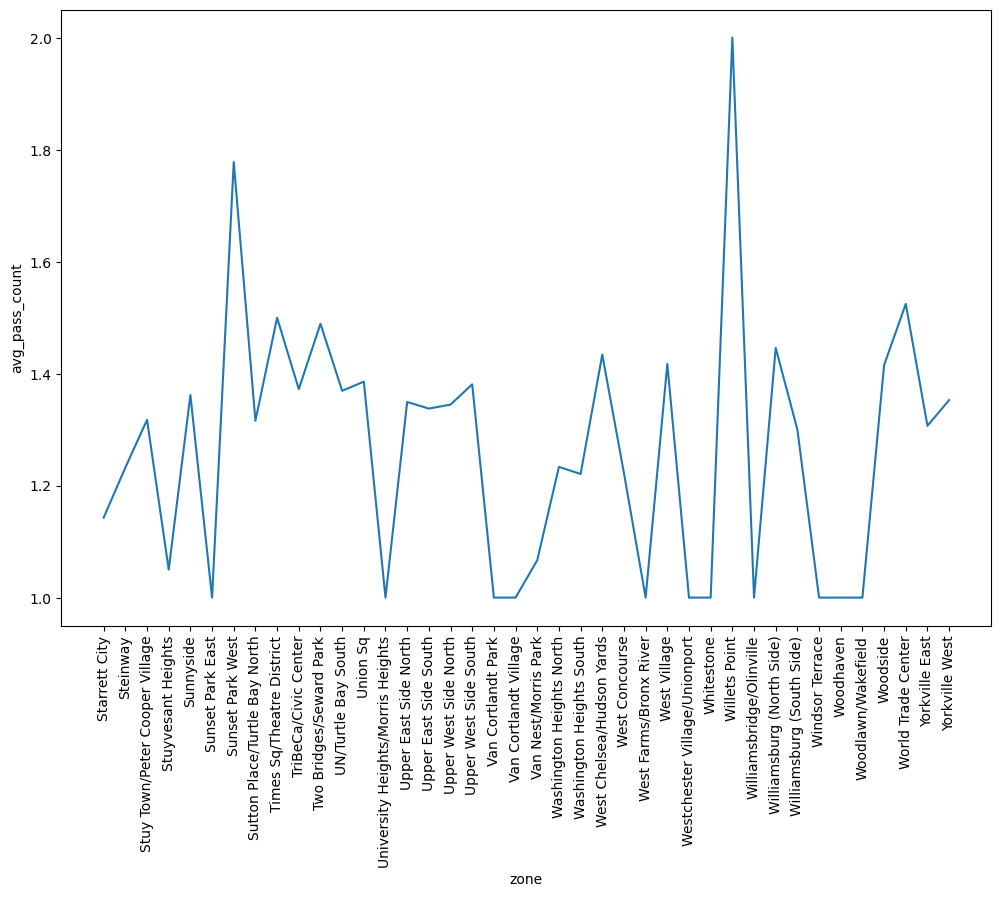

In [800]:
pass_count_4 = pass_count.iloc[195:]

plt.figure(figsize=(12, 8))
sns.lineplot(data=pass_count_4 , x= 'zone', y='avg_pass_count')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [758]:
# How often is each surcharge applied?

print("Extra: ", df_zone['extra'].unique())

print("mta_tax: ", df_zone['mta_tax'].unique())

print("Improvement_surcharge: ", df_zone['improvement_surcharge'].unique())

print("Congestion_Surcharge: ", df_zone['congestion_surcharge'].unique())


Extra:  [ 6.    1.    3.5   3.75  0.    2.5   1.25  5.    8.75  6.25  2.25  7.25
  7.5  11.25  6.8   8.5   9.75 10.    0.5   4.75  9.25  4.25  1.75  6.75
  2.75  7.75 11.75 10.25  3.25  1.5   3.2   5.25  3.   12.5   2.45 14.25]
mta_tax:  [0.5  0.   0.8  4.   0.05]
Improvement_surcharge:  [1.  0.3 0. ]
Congestion_Surcharge:  [0.  2.5]


In [768]:
#create anew column with all extra charges summed up 
df_zone['extra_charge'] = df_zone[['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge']].sum(axis=1)
df_zone_extra_charge = df_zone[df_zone['extra_charge'] > 0]

In [771]:
df_zone_extra_charge.groupby('pickup_zone')['extra_charge'].count().sort_values(ascending=False)[:20]

pickup_zone
JFK Airport                     14570
Upper East Side South           13337
Midtown Center                  13031
Upper East Side North           11783
Midtown East                    10053
Penn Station/Madison Sq West     9576
LaGuardia Airport                9531
Times Sq/Theatre District        9277
Lincoln Square East              9242
Murray Hill                      8318
Midtown North                    8034
Upper West Side South            7676
Union Sq                         7609
Clinton East                     7477
East Chelsea                     7314
Lenox Hill West                  6650
East Village                     6563
Midtown South                    6495
West Village                     6247
Gramercy                         5863
Name: extra_charge, dtype: int64

In [818]:
plt.figure(figsize= (12, 8))
sns.lineplot(df_zone_extra_charge.groupby('pickup_zone')['extra_charge'].count().sort_values(ascending=False)[0:20])
plt.xticks(rotation=90)
plt.ylabel('num_trips_with_extra_charge')
plt.show()

In [772]:
df_zone_extra_charge.groupby('dropoff_zone')['extra_charge'].count().sort_values(ascending=False)[:20]

dropoff_zone
Upper East Side North            12343
Upper East Side South            11753
Midtown Center                   10869
Times Sq/Theatre District         8377
Murray Hill                       8305
Midtown East                      7938
Lincoln Square East               7886
Upper West Side South             7787
Lenox Hill West                   7358
East Chelsea                      7143
Clinton East                      6950
Midtown North                     6916
Union Sq                          6430
Upper West Side North             6255
Penn Station/Madison Sq West      6186
Midtown South                     6055
Sutton Place/Turtle Bay North     5914
Yorkville West                    5788
East Village                      5716
Lenox Hill East                   5665
Name: extra_charge, dtype: int64

In [819]:
plt.figure(figsize= (12, 8))
sns.lineplot(df_zone_extra_charge.groupby('dropoff_zone')['extra_charge'].count().sort_values(ascending=False)[0:20])
plt.xticks(rotation=90)
plt.ylabel('num_trips_with_extra_charge')
plt.show()

In [773]:
df_zone_extra_charge.groupby('pickup_hour')['extra_charge'].count().sort_values(ascending=False)[:20]

pickup_hour
18    19068
17    18253
19    17380
15    16954
16    16853
21    16542
14    16509
20    16217
22    15603
13    15257
12    14580
11    13523
10    12654
23    12421
9     11638
8     10161
0      8317
7      7539
1      5468
6      3822
Name: extra_charge, dtype: int64

In [820]:
sns.barplot(df_zone_extra_charge.groupby('pickup_hour')['extra_charge'].count())
plt.ylabel('num_trips_with_extra_charges')
plt.show()

In [776]:
sns.barplot(df_zone_extra_charge.groupby('pickup_hour')['extra_charge'].count())
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
•	JFK airport, upper east side south, midtown center, Upper East Side North, Midtown East, etc. are some busiest zones.
•	3-6 PM weekends and 5-6 PM weekdays are the busiest hours. 
•	Availability on these times and above zones shall be maintained with priority. 

•	Early morning and late night are quite hours should be used for maintenance of cabs, pickup zones etc.

•	Weekdays (Monday, Tuesday, Wednesday) show lower traffic trends, these days can be used for week offs for drivers and other operational staff.   

•	pickup from Alphabet City and Astoria have recorded their slowest speeds. 
•	Route taken on these zones should be reviewed for further operational optimizations. 

•	JFK Airport, LaGuardia Airport, Penn Station/Madison Sq West. etc are high pickup zones. 
•	Upper West Side South, Lenox Hill West, Clinton East, etc. are high drop-off zones. 
•	Re-routing cabs from high drop-off zones to high pickup zones is recommended.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
•	Deployment of a greater number of taxis during hours (5-6 PM on weekdays, 3-6 PM on weekends) in 
•	JFK airport, upper east side south, midtown center, Upper East Side North, Midtown East zones.
•	Top 10 pickup zones during nighttime 11 PM to 5 AM 
•	[JFK Airport, Upper East Side South, Midtown Center, Upper East Side North	1488, Midtown East	1331, Penn Station/Madison Sq West	1291, 
•	LaGuardia Airport	1237, Times Sq/Theatre District	1190, Lincoln Square East 1167, Murray Hill	1063,]
•	[February, July, August, September] are months with significantly less traffic, 
•	Months [May, October] tend to show the highest traffic. 
•	Availability of a greater number of Mid-to-large taxis (XUVs) in the zones having higher passengers per trip. 
    zones like Arrochar/Fort Wadsworth, Newark Airport.
•	larger number of smaller taxis deployment in zones with less passenger per trips zone.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
•	Higher fare per mile for shorter trips for passengers more than 1
•	On weekends the number of passengers per trip is more than weekdays, on weekends at peak hours (3PM - 6PM) the price can be increased
    for more than 2 passengers
•	Zones like Arrochar/Fort Wadsworth, Newark Airport can have more fare_per_mile as number of passengers per trip is near to 3 in these zones.
•	Distance based tiered pricing, higher per mile fare for shorter trips and less for longer trips
•	Relaxed/discounted fare for pickup in high drop off zones, this can help increase new revenue.
•	Lower fare_per_mile for taking long routes in slow moving zones could achieve more revenue if more trips can be completed and 
    for passenger it is a better experience and same price.